# DATA ANALYSIS part 3: batting partnerships

In this section,the focus of the analysis were the batting partnerships and the overall runs scored by batting partners.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show/Hide Code."></form>''')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
batting_info=pd.read_csv('C:\\Users\\DELL\\Cricdata\\batting_info_v1.csv')

In [22]:
batting_info.head()

,match_id,season,start_date,innings,over,batting_team,bowling_team,striker,non_striker,runs_off_bat,extras,wicket_type,player_dismissed,partnership
0,1229326.0,2020.0,29-08-2020,1.0,1.0,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,0.0,NaN,NaN,KL Midwood & AD Carr
1,1229326.0,2020.0,29-08-2020,1.0,1.0,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,0.0,NaN,NaN,KL Midwood & AD Carr
2,1229326.0,2020.0,29-08-2020,1.0,1.0,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,0.0,NaN,NaN,KL Midwood & AD Carr
3,1229326.0,2020.0,29-08-2020,1.0,1.0,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,1.0,NaN,NaN,KL Midwood & AD Carr
4,1229326.0,2020.0,29-08-2020,1.0,1.0,Sunrisers,Southern Vipers,KL Midwood,AD Carr,0.0,1.0,NaN,NaN,KL Midwood & AD Carr


In [23]:
batter_partnership = batting_info.groupby(['match_id','season','start_date','innings','batting_team','bowling_team',
                                           'striker','non_striker','partnership']).agg({'runs_off_bat':'sum',
                                                                                        'extras':'sum'}).reset_index()

In [24]:
batter_partnership.head(15)

,match_id,season,start_date,innings,batting_team,bowling_team,striker,non_striker,partnership,runs_off_bat,extras
0,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,AD Carr,KL Midwood,KL Midwood & AD Carr,4.0,1.0
1,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,AJ Macleod,MK Villiers,AJ Macleod & MK Villiers,2.0,1.0
2,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,FC Wilson,KL Midwood,FC Wilson & KL Midwood,0.0,0.0
3,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,FC Wilson,ND Dattani,FC Wilson & ND Dattani,11.0,1.0
4,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,G Scrivens,MK Villiers,G Scrivens & MK Villiers,8.0,3.0
5,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,J Gardner,MK Villiers,MK Villiers & J Gardner,13.0,3.0
6,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KJ Wolfe,KS Castle,KJ Wolfe & KS Castle,2.0,0.0
7,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KL Midwood,AD Carr,KL Midwood & AD Carr,1.0,4.0
8,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KL Midwood,FC Wilson,FC Wilson & KL Midwood,5.0,0.0
9,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KS Castle,KJ Wolfe,KJ Wolfe & KS Castle,3.0,5.0


In [25]:
batter_partnership['net_runs']=batter_partnership['runs_off_bat']+batter_partnership['extras']

In [26]:
batter_partnership.head(15)

,match_id,season,start_date,innings,batting_team,bowling_team,striker,non_striker,partnership,runs_off_bat,extras,net_runs
0,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,AD Carr,KL Midwood,KL Midwood & AD Carr,4.0,1.0,5.0
1,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,AJ Macleod,MK Villiers,AJ Macleod & MK Villiers,2.0,1.0,3.0
2,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,FC Wilson,KL Midwood,FC Wilson & KL Midwood,0.0,0.0,0.0
3,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,FC Wilson,ND Dattani,FC Wilson & ND Dattani,11.0,1.0,12.0
4,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,G Scrivens,MK Villiers,G Scrivens & MK Villiers,8.0,3.0,11.0
5,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,J Gardner,MK Villiers,MK Villiers & J Gardner,13.0,3.0,16.0
6,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KJ Wolfe,KS Castle,KJ Wolfe & KS Castle,2.0,0.0,2.0
7,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KL Midwood,AD Carr,KL Midwood & AD Carr,1.0,4.0,5.0
8,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KL Midwood,FC Wilson,FC Wilson & KL Midwood,5.0,0.0,5.0
9,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KS Castle,KJ Wolfe,KJ Wolfe & KS Castle,3.0,5.0,8.0


<h4 align="center"> Summarise the batting partnership runs data by each innings </h4>

In [29]:
batter_partnership_innings=batter_partnership.groupby(['match_id','season','start_date','innings','batting_team',
                                                       'bowling_team','partnership']).agg({'runs_off_bat':'sum',
                                                                                          'net_runs':'sum'}).reset_index()

In [30]:
batter_partnership_innings.head(15)

,match_id,season,start_date,innings,batting_team,bowling_team,partnership,runs_off_bat,net_runs
0,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,AJ Macleod & MK Villiers,2.0,3.0
1,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,FC Wilson & KL Midwood,5.0,5.0
2,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,FC Wilson & ND Dattani,13.0,15.0
3,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,G Scrivens & MK Villiers,18.0,21.0
4,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KJ Wolfe & KS Castle,5.0,10.0
5,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KL Midwood & AD Carr,5.0,10.0
6,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KS Castle & Sonali Patel,8.0,10.0
7,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,MK Villiers & J Gardner,29.0,33.0
8,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,MK Villiers & ND Dattani,76.0,92.0
9,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,Sonali Patel & MK Villiers,3.0,3.0


<h4 align="center">Create new columns to keep the names of two batters and their individual run contributions in the partnership.</h4>

In [33]:
batter_partnership_innings[['batter1','batter2']] = batter_partnership_innings['partnership'].str.split(' & ',1,expand=True)

In [34]:
batter_partnership_innings.head(15)

,match_id,season,start_date,innings,batting_team,bowling_team,partnership,runs_off_bat,net_runs,batter1,batter2
0,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,AJ Macleod & MK Villiers,2.0,3.0,AJ Macleod,MK Villiers
1,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,FC Wilson & KL Midwood,5.0,5.0,FC Wilson,KL Midwood
2,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,FC Wilson & ND Dattani,13.0,15.0,FC Wilson,ND Dattani
3,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,G Scrivens & MK Villiers,18.0,21.0,G Scrivens,MK Villiers
4,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KJ Wolfe & KS Castle,5.0,10.0,KJ Wolfe,KS Castle
5,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KL Midwood & AD Carr,5.0,10.0,KL Midwood,AD Carr
6,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KS Castle & Sonali Patel,8.0,10.0,KS Castle,Sonali Patel
7,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,MK Villiers & J Gardner,29.0,33.0,MK Villiers,J Gardner
8,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,MK Villiers & ND Dattani,76.0,92.0,MK Villiers,ND Dattani
9,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,Sonali Patel & MK Villiers,3.0,3.0,Sonali Patel,MK Villiers


In [ ]:
#create new column to store the runs contribution of first batter in partnership in every match
batter_partnership_innings['batter1_runs']=np.nan

for j in range(len(batter_partnership)):
    for i in range(len(batter_partnership_innings)):
        if (batter_partnership_innings['batter1'][i]
            ==batter_partnership['striker'][j]) and (batter_partnership_innings['partnership'][i]
                                                     ==batter_partnership['partnership'][j]) and (batter_partnership_innings['match_id'][i]==
                                                                                                  batter_partnership['match_id'][j]):
            batter_partnership_innings['batter1_runs'][i] = batter_partnership['runs_off_bat'][j]
            

In [36]:
batter_partnership_innings.head(15)

,match_id,season,start_date,innings,batting_team,bowling_team,partnership,runs_off_bat,net_runs,batter1,batter2,batter1_runs
0,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,AJ Macleod & MK Villiers,2.0,3.0,AJ Macleod,MK Villiers,2.0
1,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,FC Wilson & KL Midwood,5.0,5.0,FC Wilson,KL Midwood,0.0
2,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,FC Wilson & ND Dattani,13.0,15.0,FC Wilson,ND Dattani,11.0
3,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,G Scrivens & MK Villiers,18.0,21.0,G Scrivens,MK Villiers,8.0
4,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KJ Wolfe & KS Castle,5.0,10.0,KJ Wolfe,KS Castle,2.0
5,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KL Midwood & AD Carr,5.0,10.0,KL Midwood,AD Carr,1.0
6,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KS Castle & Sonali Patel,8.0,10.0,KS Castle,Sonali Patel,5.0
7,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,MK Villiers & J Gardner,29.0,33.0,MK Villiers,J Gardner,16.0
8,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,MK Villiers & ND Dattani,76.0,92.0,MK Villiers,ND Dattani,36.0
9,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,Sonali Patel & MK Villiers,3.0,3.0,Sonali Patel,MK Villiers,1.0


In [ ]:
#create new column to store the runs contribution of second batter in partnership in every match
batter_partnership_innings['batter2_runs']=np.nan

for j in range(len(batter_partnership)):
    for i in range(len(batter_partnership_innings)):
        if (batter_partnership_innings['batter2'][i]
            ==batter_partnership['striker'][j]) and (batter_partnership_innings['partnership'][i]
                                                     ==batter_partnership['partnership'][j]) and (batter_partnership_innings['match_id'][i]==
                                                                                                  batter_partnership['match_id'][j]):
            batter_partnership_innings['batter2_runs'][i] = batter_partnership['runs_off_bat'][j]
            

In [38]:
batter_partnership_innings.head(15)

,match_id,season,start_date,innings,batting_team,bowling_team,partnership,runs_off_bat,net_runs,batter1,batter2,batter1_runs,batter2_runs
0,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,AJ Macleod & MK Villiers,2.0,3.0,AJ Macleod,MK Villiers,2.0,NaN
1,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,FC Wilson & KL Midwood,5.0,5.0,FC Wilson,KL Midwood,0.0,5.0
2,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,FC Wilson & ND Dattani,13.0,15.0,FC Wilson,ND Dattani,11.0,2.0
3,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,G Scrivens & MK Villiers,18.0,21.0,G Scrivens,MK Villiers,8.0,10.0
4,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KJ Wolfe & KS Castle,5.0,10.0,KJ Wolfe,KS Castle,2.0,3.0
5,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KL Midwood & AD Carr,5.0,10.0,KL Midwood,AD Carr,1.0,4.0
6,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KS Castle & Sonali Patel,8.0,10.0,KS Castle,Sonali Patel,5.0,3.0
7,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,MK Villiers & J Gardner,29.0,33.0,MK Villiers,J Gardner,16.0,13.0
8,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,MK Villiers & ND Dattani,76.0,92.0,MK Villiers,ND Dattani,36.0,40.0
9,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,Sonali Patel & MK Villiers,3.0,3.0,Sonali Patel,MK Villiers,1.0,2.0


In [39]:
batter_partnership_innings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   match_id      886 non-null    float64
 1   season        886 non-null    float64
 2   start_date    886 non-null    object 
 3   innings       886 non-null    float64
 4   batting_team  886 non-null    object 
 5   bowling_team  886 non-null    object 
 6   partnership   886 non-null    object 
 7   runs_off_bat  886 non-null    float64
 8   net_runs      886 non-null    float64
 9   batter1       886 non-null    object 
 10  batter2       886 non-null    object 
 11  batter1_runs  886 non-null    float64
 12  batter2_runs  800 non-null    float64
dtypes: float64(7), object(6)
memory usage: 90.1+ KB


In [40]:
batter_partnership_innings['batter2_runs']=batter_partnership_innings['batter2_runs'].fillna(0)

In [41]:
batter_partnership_innings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   match_id      886 non-null    float64
 1   season        886 non-null    float64
 2   start_date    886 non-null    object 
 3   innings       886 non-null    float64
 4   batting_team  886 non-null    object 
 5   bowling_team  886 non-null    object 
 6   partnership   886 non-null    object 
 7   runs_off_bat  886 non-null    float64
 8   net_runs      886 non-null    float64
 9   batter1       886 non-null    object 
 10  batter2       886 non-null    object 
 11  batter1_runs  886 non-null    float64
 12  batter2_runs  886 non-null    float64
dtypes: float64(7), object(6)
memory usage: 90.1+ KB


In [42]:
batter_partnership_innings['batter1_runs']=batter_partnership_innings['batter1_runs'].astype(int)
batter_partnership_innings['batter2_runs']=batter_partnership_innings['batter2_runs'].astype(int)

In [43]:
batter_partnership_innings.columns

Index(['match_id', 'season', 'start_date', 'innings', 'batting_team',
       'bowling_team', 'partnership', 'runs_off_bat', 'net_runs', 'batter1',
       'batter2', 'batter1_runs', 'batter2_runs'],
      dtype='object')

In [44]:
batter_partnership_innings=batter_partnership_innings[['match_id','season','start_date','innings','batting_team','bowling_team',
                                                       'partnership','runs_off_bat','net_runs',
                                                       'batter1','batter1_runs','batter2','batter2_runs']]

In [45]:
batter_partnership_innings.head()

,match_id,season,start_date,innings,batting_team,bowling_team,partnership,runs_off_bat,net_runs,batter1,batter1_runs,batter2,batter2_runs
0,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,AJ Macleod & MK Villiers,2.0,3.0,AJ Macleod,2,MK Villiers,0
1,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,FC Wilson & KL Midwood,5.0,5.0,FC Wilson,0,KL Midwood,5
2,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,FC Wilson & ND Dattani,13.0,15.0,FC Wilson,11,ND Dattani,2
3,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,G Scrivens & MK Villiers,18.0,21.0,G Scrivens,8,MK Villiers,10
4,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KJ Wolfe & KS Castle,5.0,10.0,KJ Wolfe,2,KS Castle,3


In [46]:
batter_partnership_innings['partnership'].value_counts()

GL Adams & EM McCaughan            9
HJ Armitage & RHM Hopkins          8
KE Bryce & SJ Bryce                7
BF Smith & AN Davidson-Richards    6
ME Bouchier & GL Adams             6
                                  ..
P Davies & M Home                  1
CAE Hill & P Davies                1
PC Graham & BA Langston            1
HL Fenby & BA Langston             1
GH Lewis & ME Bouchier             1
Name: partnership, Length: 582, dtype: int64

In [47]:
partners = batter_partnership_innings['partnership'].unique()
partners

array(['AJ Macleod & MK Villiers', 'FC Wilson & KL Midwood',
       'FC Wilson & ND Dattani', 'G Scrivens & MK Villiers',
       'KJ Wolfe & KS Castle', 'KL Midwood & AD Carr',
       'KS Castle & Sonali Patel', 'MK Villiers & J Gardner',
       'MK Villiers & ND Dattani', 'Sonali Patel & MK Villiers',
       'GL Adams & DN Wyatt', 'ME Bouchier & CE Dean',
       'ME Bouchier & DN Wyatt', 'PJ Scholfield & CE Dean',
       'A Capsey & A Cranstone', 'A Cranstone & AN Davidson-Richards',
       'BF Smith & A Capsey', 'FR Davies & NE Farrant',
       'GJ Gibbs & NE Farrant', 'HV Jones & SE Rowe',
       'NE Farrant & SE Rowe', 'R Southby & NE Farrant',
       'SE Rowe & A Cranstone', 'SIR Dunkley & A Cranstone',
       'HC Knight & FMK Morris', 'HC Knight & GM Hennessy',
       'HC Knight & SN Luff', 'KL George & HC Knight',
       'NAJ Wraith & HC Knight', 'CE Dean & CE Rudd',
       'E Windsor & CE Dean', 'EM McCaughan & CE Dean',
       'GL Adams & CE Dean', 'ME Bouchier & GL Adams',
  

In [48]:
#to ensure that the every partnership pair is unique and the same two batters are not considered more than once
check_partners=[] 
checked_already=[]

for i in range(len(batter_partnership_innings)):
    #traverse through partnerships and reverse their order
    reverse_partners = batter_partnership_innings['batter2'][i]+" & "+batter_partnership_innings['batter1'][i]
    #check if a reversed version is already present in the unique partnership list or not
    if reverse_partners in partners and reverse_partners not in checked_already:
        #if present then store them in check_partners list
        check_partners.append(reverse_partners) 
        # store the partnership that have already been checked to avoid double checking later
        checked_already.append(batter_partnership_innings['partnership'][i]) 

In [49]:
len(check_partners)

191

In [50]:
batter_partnership_innings[batter_partnership_innings['partnership'].isin(check_partners)]

,match_id,season,start_date,innings,batting_team,bowling_team,partnership,runs_off_bat,net_runs,batter1,batter1_runs,batter2,batter2_runs
40,1229330.0,2020.0,31-08-2020,2.0,Western Storm,Southern Vipers,GM Hennessy & HC Knight,5.0,5.0,GM Hennessy,4,HC Knight,1
46,1229330.0,2020.0,31-08-2020,2.0,Western Storm,Southern Vipers,SN Luff & HC Knight,116.0,130.0,SN Luff,60,HC Knight,56
47,1229331.0,2020.0,31-08-2020,1.0,South East Stars,Sunrisers,A Cranstone & A Capsey,0.0,0.0,A Cranstone,0,A Capsey,0
53,1229331.0,2020.0,31-08-2020,1.0,South East Stars,Sunrisers,SE Rowe & NE Farrant,40.0,47.0,SE Rowe,17,NE Farrant,23
65,1229331.0,2020.0,31-08-2020,2.0,Sunrisers,South East Stars,Sonali Patel & KS Castle,11.0,11.0,Sonali Patel,7,KS Castle,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,1252292.0,2021.0,22-09-2021,2.0,Northern Diamonds,Central Sparks,SL Kalis & A Campbell,107.0,116.0,SL Kalis,31,A Campbell,76
866,1252292.0,2021.0,22-09-2021,2.0,Northern Diamonds,Central Sparks,SL Kalis & BAM Heath,16.0,18.0,SL Kalis,10,BAM Heath,6
875,1252293.0,2021.0,25-09-2021,1.0,Northern Diamonds,Southern Vipers,SL Kalis & A Campbell,0.0,0.0,SL Kalis,0,A Campbell,0
876,1252293.0,2021.0,25-09-2021,1.0,Northern Diamonds,Southern Vipers,SL Kalis & L Dobson,1.0,1.0,SL Kalis,1,L Dobson,0


In [51]:
pin=batter_partnership_innings.index[batter_partnership_innings['partnership'].isin(check_partners)].tolist()
pin[0]

40

In [52]:
for i in range(len(pin)):
    temp_batter1 = batter_partnership_innings.at[pin[i],'batter1']
    temp_batter2 = batter_partnership_innings.at[pin[i],'batter2']
    temp_batter1_runs = batter_partnership_innings.at[pin[i],'batter1_runs']
    temp_batter2_runs = batter_partnership_innings.at[pin[i],'batter2_runs']
    
    batter_partnership_innings.at[pin[i],'partnership'] = temp_batter2+" & "+temp_batter1
    batter_partnership_innings.at[pin[i],'batter1'] = temp_batter2
    batter_partnership_innings.at[pin[i],'batter2'] = temp_batter1
    batter_partnership_innings.at[pin[i],'batter1_runs'] = temp_batter2_runs
    batter_partnership_innings.at[pin[i],'batter2_runs'] = temp_batter1_runs  

In [53]:
batter_partnership_innings[batter_partnership_innings['partnership'].isin(check_partners)]

,match_id,season,start_date,innings,batting_team,bowling_team,partnership,runs_off_bat,net_runs,batter1,batter1_runs,batter2,batter2_runs


In [54]:
batter_partnership_innings['partnership'].value_counts()

Marie Kelly & E Jones       10
AJ Macleod & CL Griffith     9
GM Hennessy & SN Luff        9
GL Adams & EM McCaughan      9
E Jones & GM Davies          9
                            ..
PA Franklin & GJ Gibbs       1
PA Franklin & C Brewer       1
NE Farrant & PA Franklin     1
HV Jones & PA Franklin       1
GH Lewis & ME Bouchier       1
Name: partnership, Length: 484, dtype: int64

In [55]:
batter_partnership_innings.head(15)

,match_id,season,start_date,innings,batting_team,bowling_team,partnership,runs_off_bat,net_runs,batter1,batter1_runs,batter2,batter2_runs
0,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,AJ Macleod & MK Villiers,2.0,3.0,AJ Macleod,2,MK Villiers,0
1,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,FC Wilson & KL Midwood,5.0,5.0,FC Wilson,0,KL Midwood,5
2,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,FC Wilson & ND Dattani,13.0,15.0,FC Wilson,11,ND Dattani,2
3,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,G Scrivens & MK Villiers,18.0,21.0,G Scrivens,8,MK Villiers,10
4,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KJ Wolfe & KS Castle,5.0,10.0,KJ Wolfe,2,KS Castle,3
5,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KL Midwood & AD Carr,5.0,10.0,KL Midwood,1,AD Carr,4
6,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KS Castle & Sonali Patel,8.0,10.0,KS Castle,5,Sonali Patel,3
7,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,MK Villiers & J Gardner,29.0,33.0,MK Villiers,16,J Gardner,13
8,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,MK Villiers & ND Dattani,76.0,92.0,MK Villiers,36,ND Dattani,40
9,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,Sonali Patel & MK Villiers,3.0,3.0,Sonali Patel,1,MK Villiers,2


In [56]:
batter_partnership_innings['message']="vs "+batter_partnership_innings['bowling_team'] +" ("+batter_partnership_innings['start_date']+")"

In [57]:
batter_partnership_innings['partner_labels'] = batter_partnership_innings['partnership']+" ("+batter_partnership_innings['batting_team']+")"

In [58]:
batter_partnership_innings.head()

,match_id,season,start_date,innings,batting_team,bowling_team,partnership,runs_off_bat,net_runs,batter1,batter1_runs,batter2,batter2_runs,message,partner_labels
0,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,AJ Macleod & MK Villiers,2.0,3.0,AJ Macleod,2,MK Villiers,0,vs Southern Vipers (29-08-2020),AJ Macleod & MK Villiers (Sunrisers)
1,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,FC Wilson & KL Midwood,5.0,5.0,FC Wilson,0,KL Midwood,5,vs Southern Vipers (29-08-2020),FC Wilson & KL Midwood (Sunrisers)
2,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,FC Wilson & ND Dattani,13.0,15.0,FC Wilson,11,ND Dattani,2,vs Southern Vipers (29-08-2020),FC Wilson & ND Dattani (Sunrisers)
3,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,G Scrivens & MK Villiers,18.0,21.0,G Scrivens,8,MK Villiers,10,vs Southern Vipers (29-08-2020),G Scrivens & MK Villiers (Sunrisers)
4,1229326.0,2020.0,29-08-2020,1.0,Sunrisers,Southern Vipers,KJ Wolfe & KS Castle,5.0,10.0,KJ Wolfe,2,KS Castle,3,vs Southern Vipers (29-08-2020),KJ Wolfe & KS Castle (Sunrisers)


In [59]:
#save the dataframe to csv file
#batter_partnership_innings.to_csv("C:\\Users\\DELL\\Cricdata\\batter_partnership_innings.csv",index=False)

## Highest Run Partnerships in an innings for each season

*Some data were externally added to the batter_partnership_innings file, so this file is being read again from the updated version*

In [3]:
batter_partnership_innings=pd.read_csv("C:\\Users\\DELL\\Cricdata\\batter_partnership_innings.csv")

In [4]:
batter_partnership_innings.tail()

,match_id,season,start_date,innings,batting_team,bowling_team,partnership,runs_off_bat,net_runs,batter1,batter1_runs,batter2,batter2_runs,message,partner_labels
907,1229328,2020,29-08-2020,2,Lightning,Thunder,AJ Freeborn & SJ Bryce,11,11,AJ Freeborn,5,SJ Bryce,6,vs Thunder (29-08-2020),AJ Freeborn & SJ Bryce (Lightning)
908,1229328,2020,29-08-2020,2,Lightning,Thunder,AJ Freeborn & B Ellis,3,4,AJ Freeborn,2,B Ellis,1,vs Thunder (29-08-2020),AJ Freeborn & B Ellis (Lightning)
909,1229328,2020,29-08-2020,2,Lightning,Thunder,AJ Freeborn & LF Higham,39,39,AJ Freeborn,20,LF Higham,19,vs Thunder (29-08-2020),AJ Freeborn & LF Higham (Lightning)
910,1229328,2020,29-08-2020,2,Lightning,Thunder,AJ Freeborn & T Graves,3,5,AJ Freeborn,2,T Graves,1,vs Thunder (29-08-2020),AJ Freeborn & T Graves (Lightning)
911,1229328,2020,29-08-2020,2,Lightning,Thunder,N Harman & S Munro,13,13,N Harman,11,S Munro,2,vs Thunder (29-08-2020),N Harman & S Munro (Lightning)


In [6]:
pdf_2020 = batter_partnership_innings[batter_partnership_innings['season']==2020].sort_values('net_runs',ascending=False)
pdf_2020 = pdf_2020.reset_index(drop=True)
pdf_2020 = pdf_2020[['partner_labels','net_runs','message']]
pdf_2020.head(20)

,partner_labels,net_runs,message
0,GM Hennessy & SN Luff (Western Storm),162,vs South East Stars (11-09-2020)
1,GL Adams & EM McCaughan (Southern Vipers),155,vs Western Storm (13-09-2020)
2,A Griffiths & GM Hennessy (Western Storm),155,vs Sunrisers (19-09-2020)
3,SJ Bryce & B Ellis (Lightning),148,vs Central Sparks (11-09-2020)
4,L Winfield & HJ Armitage (Northern Diamonds),139,vs Central Sparks (29-08-2020)
5,ME Bouchier & GL Adams (Southern Vipers),133,vs Western Storm (13-09-2020)
6,HC Knight & SN Luff (Western Storm),130,vs Southern Vipers (31-08-2020)
7,SN Luff & NAJ Wraith (Western Storm),129,vs Southern Vipers (13-09-2020)
8,T Graves & SJ Bryce (Lightning),127,vs Central Sparks (19-09-2020)
9,Marie Kelly & E Jones (Central Sparks),123,vs Northern Diamonds (13-09-2020)


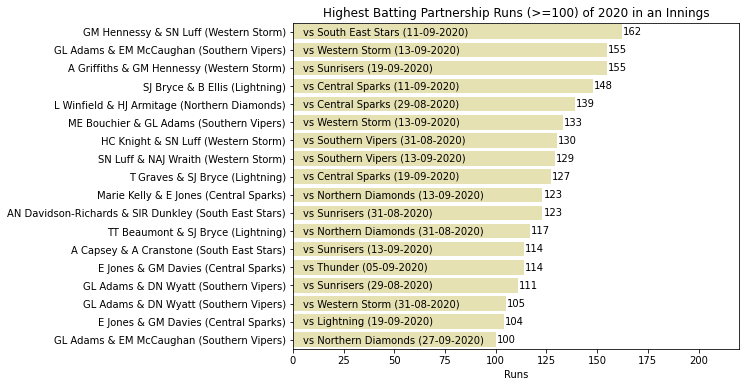

In [8]:
#plot Highest Batting Partnerships of 2020 in an Innings
df = pdf_2020.head(18)

plt.figure(figsize=(8,6))

plt.title('Highest Batting Partnership Runs (>=100) of 2020 in an Innings')
ax = sns.barplot(data=df, x='net_runs',y=df.index, orient='h',color='palegoldenrod')
ax.set_yticklabels(df.partner_labels)
plt.xlabel('Runs')
ax.set_xlim(0,220)

# write messages on bars
for bar, msg in zip(ax.patches,df['message']):
    ax.text(5, bar.get_y()+bar.get_height()/2, msg, color='black', ha='left', va='center')

# set the bar labels
for p in ax.patches:
    ax.annotate(  p.get_width().astype(int) ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(20,-10),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right' )
    
plt.savefig('C:\\Users\\DELL\\Cricdata\\Partnershipmostruns2020_innings.jpeg',bbox_inches='tight')
plt.show()

In 2020, there were 18 times when batting partners scored more 100 or more runs. GM Hennessy and SN Luff from Western Storm together scored 162, the highest ever partnership runs of the season against South East Stars on 11th September. 

In [9]:
pdf_2021 = batter_partnership_innings[batter_partnership_innings['season']==2021].sort_values('net_runs',ascending=False)
pdf_2021 = pdf_2021.reset_index(drop=True)
pdf_2021 = pdf_2021[['partner_labels','net_runs','message']]
pdf_2021.head(15)

,partner_labels,net_runs,message
0,KE Bryce & SJ Bryce (Lightning),207,vs Central Sparks (18-09-2021)
1,P Cleary & EL Lamb (Thunder),177,vs Western Storm (29-05-2021)
2,AN Davidson-Richards & SIR Dunkley (South East...,154,vs Western Storm (05-06-2021)
3,Marie Kelly & E Jones (Central Sparks),119,vs Lightning (18-09-2021)
4,SN Luff & A Griffiths (Western Storm),119,vs Sunrisers (18-09-2021)
5,A Campbell & SL Kalis (Northern Diamonds),116,vs Central Sparks (22-09-2021)
6,AJ Macleod & CL Griffith (Sunrisers),112,vs Southern Vipers (12-09-2021)
7,SL Kalis & L Winfield (Northern Diamonds),112,vs Central Sparks (29-05-2021)
8,BF Smith & AN Davidson-Richards (South East St...,107,vs Sunrisers (29-05-2021)
9,BF Smith & A Capsey (South East Stars),105,vs Lightning (10-09-2021)


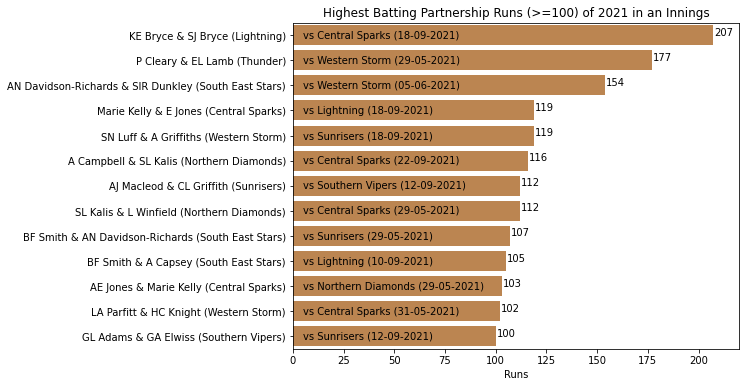

In [12]:
#plot Highest Batting Partnerships of 2021 in an Innings
df = pdf_2021.head(13)

plt.figure(figsize=(8,6))

plt.title('Highest Batting Partnership Runs (>=100) of 2021 in an Innings')
ax = sns.barplot(data=df, x='net_runs',y=df.index, orient='h',color='peru')
ax.set_yticklabels(df.partner_labels)
plt.xlabel('Runs')
ax.set_xlim(0,220)

# write messages on bars
for bar, msg in zip(ax.patches,df['message']):
    ax.text(5, bar.get_y()+bar.get_height()/2, msg, color='black', ha='left', va='center')

# set the bar labels
for p in ax.patches:
    ax.annotate(  p.get_width().astype(int) ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(20,-10),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right' )
    
plt.savefig('C:\\Users\\DELL\\Cricdata\\Partnershipmostruns2021_innings.jpeg',bbox_inches='tight')
plt.show()

In the 2021 season there were 13 occasions where 100 or more runs were scored in partnerships.The highest partnership runs in that season exceeded 200. KE Bryce and SJ Bryce from Lightning scored 207 together versus Central Sparks on 18th September.

<h4 align="center">Summarise the batting partnership runs data by each season</h4>

In [78]:
batter_partnership_innings.columns

Index(['match_id', 'season', 'start_date', 'innings', 'batting_team',
       'bowling_team', 'partnership', 'runs_off_bat', 'net_runs', 'batter1',
       'batter1_runs', 'batter2', 'batter2_runs', 'message', 'partner_labels'],
      dtype='object')

In [79]:
batter_partnership_innings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   match_id        912 non-null    int64 
 1   season          912 non-null    int64 
 2   start_date      912 non-null    object
 3   innings         912 non-null    int64 
 4   batting_team    912 non-null    object
 5   bowling_team    912 non-null    object
 6   partnership     912 non-null    object
 7   runs_off_bat    912 non-null    int64 
 8   net_runs        912 non-null    int64 
 9   batter1         912 non-null    object
 10  batter1_runs    912 non-null    int64 
 11  batter2         912 non-null    object
 12  batter2_runs    912 non-null    int64 
 13  message         912 non-null    object
 14  partner_labels  912 non-null    object
dtypes: int64(7), object(8)
memory usage: 107.0+ KB


In [80]:
batter_partnership_season = batter_partnership_innings.groupby(['season','batting_team','partnership',
                                                                 'batter1','batter2']).agg({'net_runs':'sum', 
                                                                                         'batter1_runs':'sum',
                                                                                         'batter2_runs':'sum'}).reset_index()

In [81]:
batter_partnership_season.head(15)

,season,batting_team,partnership,batter1,batter2,net_runs,batter1_runs,batter2_runs
0,2020,Central Sparks,AE Jones & GM Davies,AE Jones,GM Davies,17,6,9
1,2020,Central Sparks,AE Jones & Marie Kelly,AE Jones,Marie Kelly,9,3,4
2,2020,Central Sparks,Anisha Patel & E Jones,Anisha Patel,E Jones,3,1,2
3,2020,Central Sparks,Anisha Patel & EA Russell,Anisha Patel,EA Russell,2,1,0
4,2020,Central Sparks,CAE Hill & M Home,CAE Hill,M Home,5,1,0
5,2020,Central Sparks,CAE Hill & P Davies,CAE Hill,P Davies,46,23,11
6,2020,Central Sparks,CK Boycott & Anisha Patel,CK Boycott,Anisha Patel,9,6,2
7,2020,Central Sparks,CK Boycott & CAE Hill,CK Boycott,CAE Hill,10,1,5
8,2020,Central Sparks,CK Boycott & E Jones,CK Boycott,E Jones,19,5,14
9,2020,Central Sparks,CK Boycott & EA Russell,CK Boycott,EA Russell,4,3,1


In [82]:
batter_partnership_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   season        594 non-null    int64 
 1   batting_team  594 non-null    object
 2   partnership   594 non-null    object
 3   batter1       594 non-null    object
 4   batter2       594 non-null    object
 5   net_runs      594 non-null    int64 
 6   batter1_runs  594 non-null    int64 
 7   batter2_runs  594 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 37.2+ KB


In [83]:
batter_partnership_season = batter_partnership_season.sort_values('net_runs', ascending=False)
batter_partnership_season.reset_index(drop=True,inplace=True)
batter_partnership_season.head(15)

,season,batting_team,partnership,batter1,batter2,net_runs,batter1_runs,batter2_runs
0,2020,Southern Vipers,GL Adams & EM McCaughan,GL Adams,EM McCaughan,401,202,154
1,2021,Central Sparks,Marie Kelly & E Jones,Marie Kelly,E Jones,281,119,125
2,2021,Lightning,KE Bryce & SJ Bryce,KE Bryce,SJ Bryce,280,120,127
3,2020,Southern Vipers,ME Bouchier & GL Adams,ME Bouchier,GL Adams,277,122,142
4,2020,Lightning,SJ Bryce & B Ellis,SJ Bryce,B Ellis,268,130,112
5,2020,Central Sparks,Marie Kelly & E Jones,Marie Kelly,E Jones,266,112,126
6,2020,Central Sparks,E Jones & GM Davies,E Jones,GM Davies,261,120,104
7,2021,Western Storm,SN Luff & A Griffiths,SN Luff,A Griffiths,254,114,121
8,2021,Sunrisers,AJ Macleod & CL Griffith,AJ Macleod,CL Griffith,250,96,139
9,2021,Sunrisers,CL Griffith & G Scrivens,CL Griffith,G Scrivens,232,110,87


In [84]:
#save the dataframe to csv file
#batter_partnership_season.to_csv("C:\\Users\\DELL\\Cricdata\\batter_partnership_season.csv",index=False)

*Some data were externally added to the batter_partnership_season file, so this file is being read again from the updated version*

In [13]:
batter_partnership_season=pd.read_csv("C:\\Users\\DELL\\Cricdata\\batter_partnership_season.csv")

In [14]:
batter_partnership_season['partner_labels'] = batter_partnership_season['partnership']+" ("+batter_partnership_season['batting_team']+")"

In [15]:
batter_partnership_season.head()

,season,batting_team,partnership,batter1,batter2,net_runs,batter1_runs,batter2_runs,partner_labels
0,2020,Southern Vipers,GL Adams & EM McCaughan,GL Adams,EM McCaughan,401,202,154,GL Adams & EM McCaughan (Southern Vipers)
1,2021,Central Sparks,Marie Kelly & E Jones,Marie Kelly,E Jones,281,119,125,Marie Kelly & E Jones (Central Sparks)
2,2021,Lightning,KE Bryce & SJ Bryce,KE Bryce,SJ Bryce,280,120,127,KE Bryce & SJ Bryce (Lightning)
3,2020,Southern Vipers,ME Bouchier & GL Adams,ME Bouchier,GL Adams,277,122,142,ME Bouchier & GL Adams (Southern Vipers)
4,2020,Lightning,SJ Bryce & B Ellis,SJ Bryce,B Ellis,268,130,112,SJ Bryce & B Ellis (Lightning)


## Highest Run Partnerships for each season

In [16]:
pdf_2020_overall = batter_partnership_season[batter_partnership_season['season']==2020]
pdf_2020_overall = pdf_2020_overall.sort_values('net_runs', ascending=False)
pdf_2020_overall.reset_index(drop=True,inplace=True)
pdf_2020_overall.head(15)

,season,batting_team,partnership,batter1,batter2,net_runs,batter1_runs,batter2_runs,partner_labels
0,2020,Southern Vipers,GL Adams & EM McCaughan,GL Adams,EM McCaughan,401,202,154,GL Adams & EM McCaughan (Southern Vipers)
1,2020,Southern Vipers,ME Bouchier & GL Adams,ME Bouchier,GL Adams,277,122,142,ME Bouchier & GL Adams (Southern Vipers)
2,2020,Lightning,SJ Bryce & B Ellis,SJ Bryce,B Ellis,268,130,112,SJ Bryce & B Ellis (Lightning)
3,2020,Central Sparks,Marie Kelly & E Jones,Marie Kelly,E Jones,266,112,126,Marie Kelly & E Jones (Central Sparks)
4,2020,Central Sparks,E Jones & GM Davies,E Jones,GM Davies,261,120,104,E Jones & GM Davies (Central Sparks)
5,2020,Southern Vipers,GL Adams & DN Wyatt,GL Adams,DN Wyatt,216,73,107,GL Adams & DN Wyatt (Southern Vipers)
6,2020,Northern Diamonds,L Winfield & HJ Armitage,L Winfield,HJ Armitage,179,93,60,L Winfield & HJ Armitage (Northern Diamonds)
7,2020,Western Storm,GM Hennessy & SN Luff,GM Hennessy,SN Luff,179,94,82,GM Hennessy & SN Luff (Western Storm)
8,2020,Western Storm,SN Luff & NAJ Wraith,SN Luff,NAJ Wraith,173,79,86,SN Luff & NAJ Wraith (Western Storm)
9,2020,Western Storm,HC Knight & SN Luff,HC Knight,SN Luff,156,73,68,HC Knight & SN Luff (Western Storm)


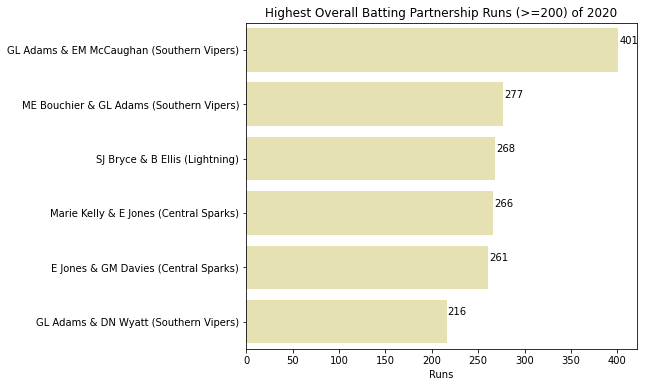

In [21]:
#plot 10 Highest Overall Batting Partnerships of 2020
df = pdf_2020_overall.head(6)

plt.figure(figsize=(7,6))

plt.title('Highest Overall Batting Partnership Runs (>=200) of 2020')
ax = sns.barplot(data=df, x='net_runs',y=df.index, orient='h',color='palegoldenrod')
ax.set_yticklabels(df.partner_labels)
plt.xlabel('Runs')

# set the bar labels
for p in ax.patches:
    ax.annotate(  p.get_width().astype(int) ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(20,-15),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right' )
    
plt.savefig('C:\\Users\\DELL\\Cricdata\\Partnershipmostruns2020_overall.jpeg',bbox_inches='tight')
plt.show()

When considering the overall net runs accumulated in partnerships, it was found that GL Adams and EM McCaughan from Southern Vipers scored 407 runs between themselves in all the matches of 2020. Five other partner pairs scored above 200 runs of which two were from Southern Vipers, two from Central Sparks and one from Lightning.

In [22]:
pdf_2021_overall = batter_partnership_season[batter_partnership_season['season']==2021]
pdf_2021_overall = pdf_2021_overall.sort_values('net_runs', ascending=False)
pdf_2021_overall.reset_index(drop=True,inplace=True)
pdf_2021_overall.head(15)

,season,batting_team,partnership,batter1,batter2,net_runs,batter1_runs,batter2_runs,partner_labels
0,2021,Central Sparks,Marie Kelly & E Jones,Marie Kelly,E Jones,281,119,125,Marie Kelly & E Jones (Central Sparks)
1,2021,Lightning,KE Bryce & SJ Bryce,KE Bryce,SJ Bryce,280,120,127,KE Bryce & SJ Bryce (Lightning)
2,2021,Western Storm,SN Luff & A Griffiths,SN Luff,A Griffiths,254,114,121,SN Luff & A Griffiths (Western Storm)
3,2021,Sunrisers,AJ Macleod & CL Griffith,AJ Macleod,CL Griffith,250,96,139,AJ Macleod & CL Griffith (Sunrisers)
4,2021,Sunrisers,CL Griffith & G Scrivens,CL Griffith,G Scrivens,232,110,87,CL Griffith & G Scrivens (Sunrisers)
5,2021,South East Stars,BF Smith & AN Davidson-Richards,BF Smith,AN Davidson-Richards,223,137,68,BF Smith & AN Davidson-Richards (South East St...
6,2021,Southern Vipers,ME Bouchier & GL Adams,ME Bouchier,GL Adams,209,108,87,ME Bouchier & GL Adams (Southern Vipers)
7,2021,Thunder,P Cleary & EL Lamb,P Cleary,EL Lamb,189,81,92,P Cleary & EL Lamb (Thunder)
8,2021,Southern Vipers,GL Adams & GA Elwiss,GL Adams,GA Elwiss,189,74,99,GL Adams & GA Elwiss (Southern Vipers)
9,2021,Thunder,EL Lamb & GEB Boyce,EL Lamb,GEB Boyce,189,89,69,EL Lamb & GEB Boyce (Thunder)


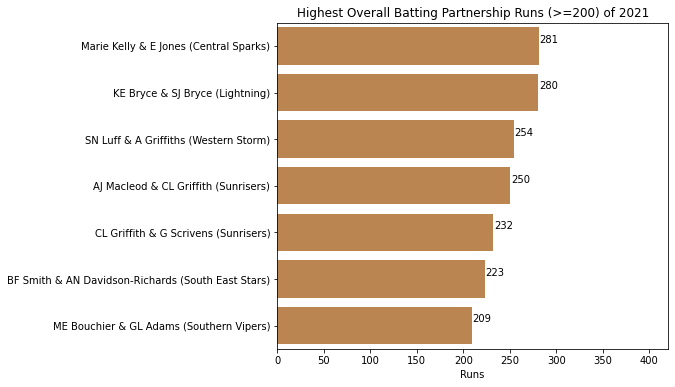

In [24]:
#plot 10 Highest Overall Batting Partnerships of 2021
df = pdf_2021_overall.head(7)

plt.figure(figsize=(7,6))

plt.title('Highest Overall Batting Partnership Runs (>=200) of 2021')
ax = sns.barplot(data=df, x='net_runs',y=df.index, orient='h',color='peru')
ax.set_yticklabels(df.partner_labels)
plt.xlabel('Runs')
ax.set_xlim(0,420)

# set the bar labels
for p in ax.patches:
    ax.annotate(  p.get_width().astype(int) ,( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(20,-15),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right' )
    
plt.savefig('C:\\Users\\DELL\\Cricdata\\Partnershipmostruns2021_overall.jpeg',bbox_inches='tight')
plt.show()

In 2021, eight partner pairs scored above net runs together above 200. Two were from Sunrisers and there was one each from Central Sparks, Lightning, Western Storm, South East Stars and Southern Vipers. The highest was Marie Kelly and E Jones from Central Sparks with 281 runs. 

In [93]:
#find the overall partnership runs of both seasons
partner_order=batter_partnership_season.groupby('partner_labels')['net_runs'].sum().sort_values(ascending=False)
partner_order[:15]

partner_labels
Marie Kelly & E Jones (Central Sparks)                   547
ME Bouchier & GL Adams (Southern Vipers)                 486
GL Adams & EM McCaughan (Southern Vipers)                456
KE Bryce & SJ Bryce (Lightning)                          433
E Jones & GM Davies (Central Sparks)                     388
GL Adams & DN Wyatt (Southern Vipers)                    366
SN Luff & A Griffiths (Western Storm)                    354
AJ Macleod & CL Griffith (Sunrisers)                     315
AN Davidson-Richards & SIR Dunkley (South East Stars)    307
HC Knight & SN Luff (Western Storm)                      306
GM Hennessy & SN Luff (Western Storm)                    281
SJ Bryce & B Ellis (Lightning)                           280
L Winfield & HJ Armitage (Northern Diamonds)             263
A Capsey & A Cranstone (South East Stars)                241
CL Griffith & G Scrivens (Sunrisers)                     232
Name: net_runs, dtype: int64

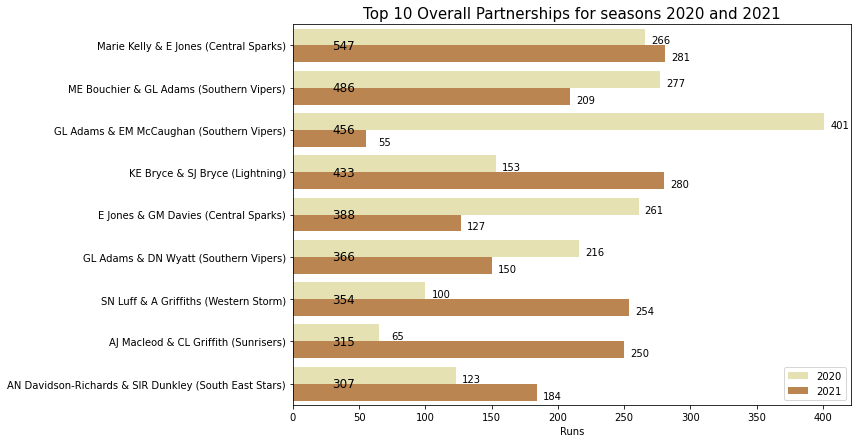

In [94]:
#plot batters with most runs for both seasons
plt.figure(figsize=(10,7))
plt.title('Top 10 Overall Partnerships for seasons 2020 and 2021',fontsize=15) 
ax=sns.barplot(data=batter_partnership_season,x='net_runs',y='partner_labels',orient='h',hue='season',
               palette=['palegoldenrod','peru'],order=partner_order[:9].index.values)

# set the bar labels
for p in ax.patches:
    ax.annotate( p.get_width().astype(int),( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(25,-15),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right' )

# write values on bars
for bar, msg in zip(ax.patches, partner_order[:9]):
    ax.text(30, bar.get_y()+bar.get_height()/1.0, msg, fontsize=12,color='black', ha='left', va='center')
    
plt.xlabel('Runs')
plt.ylabel('')
ax.legend(loc='lower right')

plt.savefig('C:\\Users\\DELL\\Cricdata\Partnershipsbothseasons.jpeg',bbox_inches='tight')
plt.show()

In [95]:
batter_partnership_season.head()

,season,batting_team,partnership,batter1,batter2,net_runs,batter1_runs,batter2_runs,partner_labels
0,2020,Southern Vipers,GL Adams & EM McCaughan,GL Adams,EM McCaughan,401,202,154,GL Adams & EM McCaughan (Southern Vipers)
1,2021,Central Sparks,Marie Kelly & E Jones,Marie Kelly,E Jones,281,119,125,Marie Kelly & E Jones (Central Sparks)
2,2021,Lightning,KE Bryce & SJ Bryce,KE Bryce,SJ Bryce,280,120,127,KE Bryce & SJ Bryce (Lightning)
3,2020,Southern Vipers,ME Bouchier & GL Adams,ME Bouchier,GL Adams,277,122,142,ME Bouchier & GL Adams (Southern Vipers)
4,2020,Lightning,SJ Bryce & B Ellis,SJ Bryce,B Ellis,268,130,112,SJ Bryce & B Ellis (Lightning)


<h4 align="center">Summarise the batting partnership runs data overall</h4>

In [96]:
batter_partnership_overall=batter_partnership_season.groupby(['batting_team','partnership',
                                                               'batter1','batter2','partner_labels']).agg({'net_runs':'sum',
                                                                                            'batter1_runs':'sum',
                                                                                            'batter2_runs':'sum'}).reset_index()

In [97]:
batter_partnership_overall.head(10)

,batting_team,partnership,batter1,batter2,partner_labels,net_runs,batter1_runs,batter2_runs
0,Central Sparks,AE Jones & GM Davies,AE Jones,GM Davies,AE Jones & GM Davies (Central Sparks),27,8,15
1,Central Sparks,AE Jones & M Home,AE Jones,M Home,AE Jones & M Home (Central Sparks),93,59,19
2,Central Sparks,AE Jones & Marie Kelly,AE Jones,Marie Kelly,AE Jones & Marie Kelly (Central Sparks),112,74,35
3,Central Sparks,AE Jones & S Glenn,AE Jones,S Glenn,AE Jones & S Glenn (Central Sparks),54,39,13
4,Central Sparks,Anisha Patel & E Jones,Anisha Patel,E Jones,Anisha Patel & E Jones (Central Sparks),3,1,2
5,Central Sparks,Anisha Patel & EA Russell,Anisha Patel,EA Russell,Anisha Patel & EA Russell (Central Sparks),2,1,0
6,Central Sparks,CAE Hill & GK Davis,CAE Hill,GK Davis,CAE Hill & GK Davis (Central Sparks),18,8,4
7,Central Sparks,CAE Hill & M Home,CAE Hill,M Home,CAE Hill & M Home (Central Sparks),5,1,0
8,Central Sparks,CAE Hill & P Davies,CAE Hill,P Davies,CAE Hill & P Davies (Central Sparks),46,23,11
9,Central Sparks,CAE Hill & TF Brookes,CAE Hill,TF Brookes,CAE Hill & TF Brookes (Central Sparks),2,2,0


In [98]:
batter_partnership_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   batting_team    492 non-null    object
 1   partnership     492 non-null    object
 2   batter1         492 non-null    object
 3   batter2         492 non-null    object
 4   partner_labels  492 non-null    object
 5   net_runs        492 non-null    int64 
 6   batter1_runs    492 non-null    int64 
 7   batter2_runs    492 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 30.9+ KB


In [99]:
batter_partnership_overall['partnership'].value_counts()

AE Jones & GM Davies        1
K Speed & KS Castle         1
J Gardner & H Brown         1
J Gardner & FC Wilson       1
J Gardner & AJ Macleod      1
                           ..
LCN Smith & BA Langston     1
L Winfield & HJ Armitage    1
L Tipton & A Campbell       1
L Dobson & SL Kalis         1
SN Luff & S Hutchins        1
Name: partnership, Length: 492, dtype: int64

In [100]:
#save the dataframe to csv file
batter_partnership_overall.to_csv("C:\\Users\\DELL\\Cricdata\\batter_partnership_overall.csv",index=False)

## Overall Most Matches Played by Partnerships

In [101]:
batter_partnership_innings.head()

,match_id,season,start_date,innings,batting_team,bowling_team,partnership,runs_off_bat,net_runs,batter1,batter1_runs,batter2,batter2_runs,message,partner_labels
0,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,AJ Macleod & MK Villiers,2,3,AJ Macleod,2,MK Villiers,0,vs Southern Vipers (29-08-2020),AJ Macleod & MK Villiers (Sunrisers)
1,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,FC Wilson & KL Midwood,5,5,FC Wilson,0,KL Midwood,5,vs Southern Vipers (29-08-2020),FC Wilson & KL Midwood (Sunrisers)
2,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,FC Wilson & ND Dattani,13,15,FC Wilson,11,ND Dattani,2,vs Southern Vipers (29-08-2020),FC Wilson & ND Dattani (Sunrisers)
3,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,G Scrivens & MK Villiers,18,21,G Scrivens,8,MK Villiers,10,vs Southern Vipers (29-08-2020),G Scrivens & MK Villiers (Sunrisers)
4,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,KJ Wolfe & KS Castle,5,10,KJ Wolfe,2,KS Castle,3,vs Southern Vipers (29-08-2020),KJ Wolfe & KS Castle (Sunrisers)


In [102]:
batter_partnership_innings['partner_labels'].value_counts().head(11)

Marie Kelly & E Jones (Central Sparks)           10
AJ Macleod & CL Griffith (Sunrisers)              9
GL Adams & EM McCaughan (Southern Vipers)         9
E Jones & GM Davies (Central Sparks)              9
GM Hennessy & SN Luff (Western Storm)             9
A Campbell & SL Kalis (Northern Diamonds)         8
HJ Armitage & RHM Hopkins (Northern Diamonds)     8
ME Bouchier & GL Adams (Southern Vipers)          8
KE Bryce & SJ Bryce (Lightning)                   8
FMK Morris & LA Parfitt (Western Storm)           7
L Winfield & HJ Armitage (Northern Diamonds)      7
Name: partner_labels, dtype: int64

In [103]:
partner_matches = batter_partnership_innings['partner_labels'].value_counts().rename_axis('partner_labels').reset_index(name='matches')
partner_matches.head(15)

,partner_labels,matches
0,Marie Kelly & E Jones (Central Sparks),10
1,AJ Macleod & CL Griffith (Sunrisers),9
2,GL Adams & EM McCaughan (Southern Vipers),9
3,E Jones & GM Davies (Central Sparks),9
4,GM Hennessy & SN Luff (Western Storm),9
5,A Campbell & SL Kalis (Northern Diamonds),8
6,HJ Armitage & RHM Hopkins (Northern Diamonds),8
7,ME Bouchier & GL Adams (Southern Vipers),8
8,KE Bryce & SJ Bryce (Lightning),8
9,FMK Morris & LA Parfitt (Western Storm),7


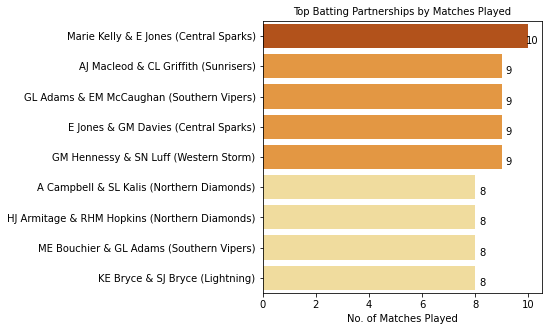

In [109]:
#plot number of wins by team
plt.figure(figsize=(5, 5))
plt.title('Top Batting Partnerships by Matches Played',fontsize=10) 
ax=sns.barplot(x='matches',y='partner_labels', data=partner_matches.head(9), 
                 hue='matches',palette='YlOrBr',dodge=False)

# set the bar labels
for p in ax.patches:
    ax.annotate( p.get_width().astype(int),( (p.get_x() + p.get_width()), p.get_y() ), 
                xytext=(10,-20),fontsize=10,color='black',textcoords='offset points',horizontalalignment='right' )     
    
plt.ylabel('')
plt.xlabel('No. of Matches Played')
ax.legend_.remove()

plt.savefig('C:\\Users\\DELL\\Cricdata\Partnershipmatches.jpeg',bbox_inches='tight')
plt.show()

In [111]:
mp = partner_matches['matches'].value_counts().rename_axis('matches').reset_index(name='partnerships')
mp

,matches,partnerships
0,1,302
1,2,96
2,3,43
3,4,18
4,6,11
5,5,9
6,9,4
7,8,4
8,7,4
9,10,1


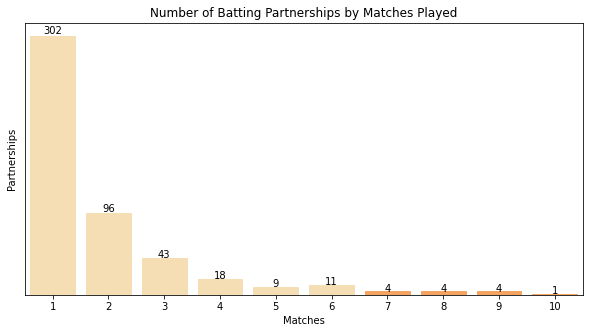

In [131]:
plt.figure(figsize=(10,5))

plt.title('Number of Batting Partnerships by Matches Played')

ax=sns.barplot(data=mp,x='matches',y='partnerships')
plt.ylabel('Partnerships')
plt.xlabel('Matches')

#set bar colors
for bar in ax.patches:
    if bar.get_height() < 5:
        bar.set_color('sandybrown')    
    else:
        bar.set_color('wheat')
        
# set the bar labels 
for p in ax.patches:
    _x = p.get_x() + p.get_width()/2
    _y = p.get_y() + p.get_height()/0.99
    value = p.get_height().astype(int)
    ax.text(_x, _y, value, ha="center")

#hide y axis ticks
ax.axes.yaxis.set_ticks([])

plt.savefig('C:\\Users\\DELL\\Cricdata\\MatchesPartenrships_nos.jpeg',bbox_inches='tight')
plt.show()

In [132]:
batter_partnership_overall.head()

,batting_team,partnership,batter1,batter2,partner_labels,net_runs,batter1_runs,batter2_runs
0,Central Sparks,AE Jones & GM Davies,AE Jones,GM Davies,AE Jones & GM Davies (Central Sparks),27,8,15
1,Central Sparks,AE Jones & M Home,AE Jones,M Home,AE Jones & M Home (Central Sparks),93,59,19
2,Central Sparks,AE Jones & Marie Kelly,AE Jones,Marie Kelly,AE Jones & Marie Kelly (Central Sparks),112,74,35
3,Central Sparks,AE Jones & S Glenn,AE Jones,S Glenn,AE Jones & S Glenn (Central Sparks),54,39,13
4,Central Sparks,Anisha Patel & E Jones,Anisha Patel,E Jones,Anisha Patel & E Jones (Central Sparks),3,1,2


In [133]:
batter_partnership_overall = pd.merge(batter_partnership_overall,partner_matches,how="outer",on='partner_labels')

In [134]:
batter_partnership_overall.head(15)

,batting_team,partnership,batter1,batter2,partner_labels,net_runs,batter1_runs,batter2_runs,matches
0,Central Sparks,AE Jones & GM Davies,AE Jones,GM Davies,AE Jones & GM Davies (Central Sparks),27,8,15,2
1,Central Sparks,AE Jones & M Home,AE Jones,M Home,AE Jones & M Home (Central Sparks),93,59,19,2
2,Central Sparks,AE Jones & Marie Kelly,AE Jones,Marie Kelly,AE Jones & Marie Kelly (Central Sparks),112,74,35,2
3,Central Sparks,AE Jones & S Glenn,AE Jones,S Glenn,AE Jones & S Glenn (Central Sparks),54,39,13,2
4,Central Sparks,Anisha Patel & E Jones,Anisha Patel,E Jones,Anisha Patel & E Jones (Central Sparks),3,1,2,1
5,Central Sparks,Anisha Patel & EA Russell,Anisha Patel,EA Russell,Anisha Patel & EA Russell (Central Sparks),2,1,0,1
6,Central Sparks,CAE Hill & GK Davis,CAE Hill,GK Davis,CAE Hill & GK Davis (Central Sparks),18,8,4,1
7,Central Sparks,CAE Hill & M Home,CAE Hill,M Home,CAE Hill & M Home (Central Sparks),5,1,0,1
8,Central Sparks,CAE Hill & P Davies,CAE Hill,P Davies,CAE Hill & P Davies (Central Sparks),46,23,11,1
9,Central Sparks,CAE Hill & TF Brookes,CAE Hill,TF Brookes,CAE Hill & TF Brookes (Central Sparks),2,2,0,1


In [135]:
#save the dataframe to csv file
batter_partnership_overall.to_csv("C:\\Users\\DELL\\Cricdata\\batter_partnership_overall.csv",index=False)

## Distribution of Partnership Runs

In [136]:
batter_partnership_overall['batting_team'].unique()

array(['Central Sparks', 'Lightning', 'Northern Diamonds',
       'South East Stars', 'Southern Vipers', 'Sunrisers', 'Thunder',
       'Western Storm'], dtype=object)

In [137]:
batter_partnership_overall.head()

,batting_team,partnership,batter1,batter2,partner_labels,net_runs,batter1_runs,batter2_runs,matches
0,Central Sparks,AE Jones & GM Davies,AE Jones,GM Davies,AE Jones & GM Davies (Central Sparks),27,8,15,2
1,Central Sparks,AE Jones & M Home,AE Jones,M Home,AE Jones & M Home (Central Sparks),93,59,19,2
2,Central Sparks,AE Jones & Marie Kelly,AE Jones,Marie Kelly,AE Jones & Marie Kelly (Central Sparks),112,74,35,2
3,Central Sparks,AE Jones & S Glenn,AE Jones,S Glenn,AE Jones & S Glenn (Central Sparks),54,39,13,2
4,Central Sparks,Anisha Patel & E Jones,Anisha Patel,E Jones,Anisha Patel & E Jones (Central Sparks),3,1,2,1


<Figure size 1440x216 with 0 Axes>

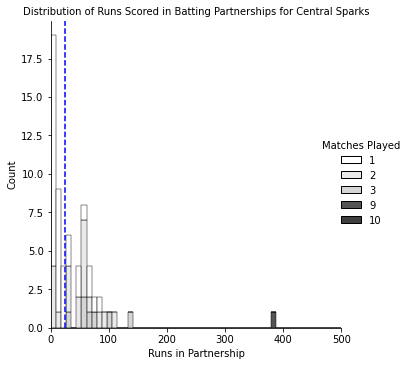

In [28]:
#plot distribution of Runs Scored in Batting Partnerships for Central Sparks
plt.figure(figsize=(20,3))
df=batter_partnership_overall[batter_partnership_overall['batting_team']=='Central Sparks']
ax=sns.displot(data=df,x='net_runs', bins=62, multiple="stack", hue='matches', palette="gist_yarg")
plt.title('Distribution of Runs Scored in Batting Partnerships for Central Sparks',fontsize =10)
plt.xlabel('Runs in Partnership')
ax._legend.set_title('Matches Played') 
plt.xlim(0,500)
plt.axvline(x=df.net_runs.median(),color='blue',ls='--',lw=1.5)

plt.savefig('C:\\Users\\DELL\\Cricdata\\Partnership_CentralSpark_Dist.jpeg',bbox_inches='tight')
plt.show()

The net runs in partnerships ranged from 0 to 100 with 25 being the median and the most partnerships played only up to three matches. The exception was only one partnership that played nine matches and scored close to 380 runs. 

<Figure size 1440x216 with 0 Axes>

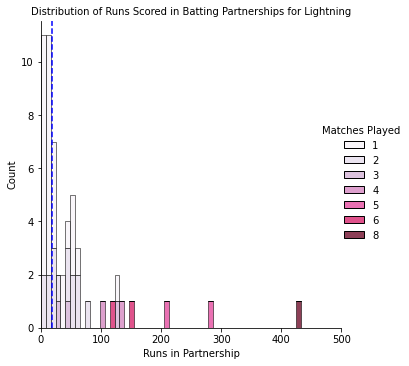

In [12]:
#plot distribution of Runs Scored in Batting Partnerships for Lightning
plt.figure(figsize=(20,3))
df=batter_partnership_overall[batter_partnership_overall['batting_team']=='Lightning']
ax=sns.displot(data=df,x='net_runs', bins=53, multiple="stack", hue='matches', palette="PuRd")
plt.title('Distribution of Runs Scored in Batting Partnerships for Lightning',fontsize=10)
plt.xlabel('Runs in Partnership')
ax._legend.set_title('Matches Played')
plt.xlim(0,500)
plt.axvline(x=df.net_runs.median(),color='blue',ls='--',lw=1.5)

plt.savefig('C:\\Users\\DELL\\Cricdata\\Partnership_Lightning_Dist.jpeg',bbox_inches='tight')
plt.show()

Most partnerships with less match experience scored runs in the range of 0 to 80 with the median being close to 20. Some batting partners having played more than four matches scored more than 100 runs with a few having close to 200 and 300. The highest net runs scored by a partnership with match experience of eight was close to 430. 

<Figure size 1440x216 with 0 Axes>

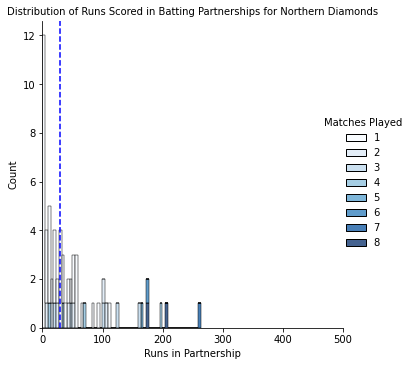

In [18]:
#plot distribution of Runs Scored in Batting Partnerships for Northern Diamonds
plt.figure(figsize=(20,3))
df=batter_partnership_overall[batter_partnership_overall['batting_team']=='Northern Diamonds']
ax=sns.displot(data=df,x='net_runs', bins=58, multiple="stack", hue='matches', palette="Blues")
plt.title('Distribution of Runs Scored in Batting Partnerships for Northern Diamonds',fontsize=10)
plt.xlabel('Runs in Partnership')
ax._legend.set_title('Matches Played')
plt.xlim(0,500)
plt.axvline(x=df.net_runs.median(),color='blue',ls='--',lw=1.5)

plt.savefig('C:\\Users\\DELL\\Cricdata\\Partnership_Northern Diamonds_Dist.jpeg',bbox_inches='tight')
plt.show()

The net runs scored by the different partnerships ranged from 0 to 90 with the median being around 30 runs. The higher run scoring partnerships in the range of 150 to 280 runs were those having played five or more matches. 

<Figure size 1440x216 with 0 Axes>

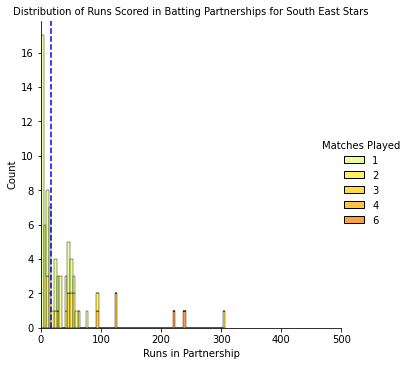

In [39]:
#plot distribution of Runs Scored in Batting Partnerships for South East Stars
plt.figure(figsize=(20,3))
df=batter_partnership_overall[batter_partnership_overall['batting_team']=='South East Stars']
ax=sns.displot(data=df,x='net_runs', bins=70, multiple="stack", hue='matches', palette="Wistia")
plt.title('Distribution of Runs Scored in Batting Partnerships for South East Stars',fontsize=10)
plt.xlabel('Runs in Partnership')
ax._legend.set_title('Matches Played')
plt.xlim(0,500)
plt.axvline(x=df.net_runs.median(),color='blue',ls='--',lw=1.5)

#plt.savefig('C:\\Users\\DELL\\Cricdata\\Partnership_SouthEastStars_Dist.jpeg',bbox_inches='tight')
plt.show()

The net run range was between 0 to 80 and the median was between 15 to 20. There were few experienced partnerships that went on to score above 100 and also 200 runs. The highest was close to 300 runs. 

<Figure size 1440x216 with 0 Axes>

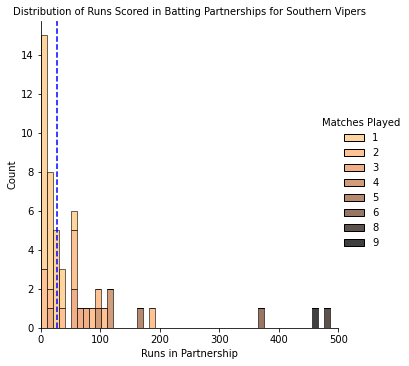

In [6]:
#plot distribution of Runs Scored in Batting Partnerships for Southern Vipers
plt.figure(figsize=(20,3))
df=batter_partnership_overall[batter_partnership_overall['batting_team']=='Southern Vipers']
ax=sns.displot(data=df,x='net_runs', bins=48, multiple="stack", hue='matches', palette="copper_r")
plt.title('Distribution of Runs Scored in Batting Partnerships for Southern Vipers',fontsize=10)
plt.xlabel('Runs in Partnership')
ax._legend.set_title('Matches Played')
plt.xlim(0,500)
plt.axvline(x=df.net_runs.median(),color='blue',ls='--',lw=1.5)

plt.savefig('C:\\Users\\DELL\\Cricdata\\Partnership_SouthernVipers_Dist.jpeg',bbox_inches='tight')
plt.show()

The overall runs scored by the batting partners for Southern Vipers ranged from 0 to around 120 with the median being around 25 to 30 runs. High scoring partnerships were generally those playing more matches with few having above 150 and some even close to 400 and 500 runs. 

<Figure size 1440x216 with 0 Axes>

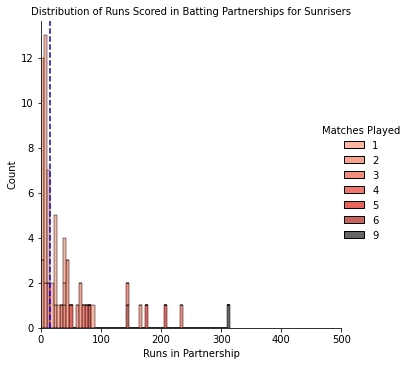

In [9]:
#plot distribution of Runs Scored in Batting Partnerships for Sunrisers
plt.figure(figsize=(20,3))
df=batter_partnership_overall[batter_partnership_overall['batting_team']=='Sunrisers']
ax=sns.displot(data=df,x='net_runs', bins=60, multiple="stack", hue='matches', palette="Reds_d")
plt.title('Distribution of Runs Scored in Batting Partnerships for Sunrisers',fontsize=10)
plt.xlabel('Runs in Partnership')
ax._legend.set_title('Matches Played')
plt.xlim(0,500)
plt.axvline(x=df.net_runs.median(),color='blue',ls='--',lw=1.5)

plt.savefig('C:\\Users\\DELL\\Cricdata\\Partnership_Sunrisers_Dist.jpeg',bbox_inches='tight')
plt.show()

The net runs scored for Sunrisers by all the partnerships ranged from 0 to 90 with the median being around 15 runs. Few partnerships accumulated more runs within 150 to 200 while there were some who had more than 200 runs with the highest runs scored being even above 300. 

<Figure size 1440x216 with 0 Axes>

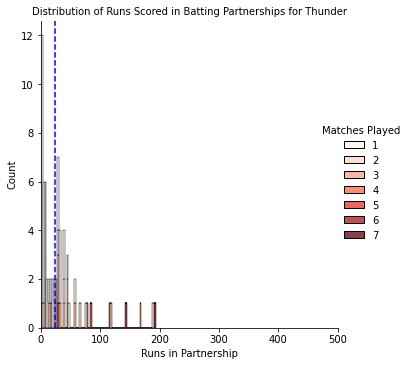

In [34]:
#plot distribution of Runs Scored in Batting Partnerships for Thunder
plt.figure(figsize=(20,3))
df=batter_partnership_overall[batter_partnership_overall['batting_team']=='Thunder']
ax=sns.displot(data=df,x='net_runs', bins=63, multiple="stack", hue='matches', palette="Reds")
plt.title('Distribution of Runs Scored in Batting Partnerships for Thunder',fontsize=10)
plt.xlabel('Runs in Partnership')
ax._legend.set_title('Matches Played')
plt.xlim(0,500)
plt.axvline(x=df.net_runs.median(),color='blue',ls='--',lw=1.5)

plt.savefig('C:\\Users\\DELL\\Cricdata\\Partnership_Thunder_Dist.jpeg',bbox_inches='tight')
plt.show()

Most batting partnerships scored net runs ranging from 0 to 90 with median between 20 to 25 in the matches played in the two seasons. Few partnerships had net runs in the range from 100 to 200. 

<Figure size 1440x216 with 0 Axes>

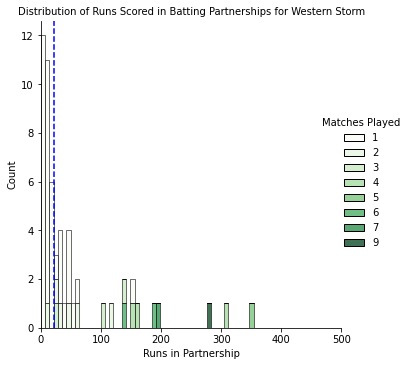

In [15]:
#plot distribution of Runs Scored in Batting Partnerships for Western Storm
plt.figure(figsize=(20,3))
df=batter_partnership_overall[batter_partnership_overall['batting_team']=='Western Storm']
ax=sns.displot(data=df,x='net_runs', bins=50, multiple="stack", hue='matches', palette="Greens")
plt.title('Distribution of Runs Scored in Batting Partnerships for Western Storm',fontsize=10)
plt.xlabel('Runs in Partnership')
ax._legend.set_title('Matches Played')
plt.xlim(0,500)
plt.axvline(x=df.net_runs.median(),color='blue',ls='--',lw=1.5)

plt.savefig('C:\\Users\\DELL\\Cricdata\\Partnership_WesternStorm_Dist.jpeg',bbox_inches='tight')
plt.show()

Most partnerships played only one, two or three matches and the runs scored by them ranged from 0 to 60. The median was close to 20. Some partnerships with more match experience scored above 100 net runs with few being close to 200 and 300 and the highest was around 350.

## Overall Partnership Networks of Each Team

In [146]:
batter_partnership_overall.columns

Index(['batting_team', 'partnership', 'batter1', 'batter2', 'partner_labels',
       'net_runs', 'batter1_runs', 'batter2_runs', 'matches'],
      dtype='object')

In [147]:
batter_partnership_network = batter_partnership_overall[['batting_team', 'partnership', 'batter1', 'batter2',
                                                          'batter1_runs', 'batter2_runs']]
batter_partnership_network.head()

,batting_team,partnership,batter1,batter2,batter1_runs,batter2_runs
0,Central Sparks,AE Jones & GM Davies,AE Jones,GM Davies,8,15
1,Central Sparks,AE Jones & M Home,AE Jones,M Home,59,19
2,Central Sparks,AE Jones & Marie Kelly,AE Jones,Marie Kelly,74,35
3,Central Sparks,AE Jones & S Glenn,AE Jones,S Glenn,39,13
4,Central Sparks,Anisha Patel & E Jones,Anisha Patel,E Jones,1,2


In [ ]:
#create two nodes to indicate which batter contributed more runs (to_node) and which batter contributed less runs (from_node) 
#in the partnerships
batter_partnership_network['from_node']=np.nan
batter_partnership_network['to_node']=np.nan

for i in range(len(batter_partnership_network)):
    if min(batter_partnership_network['batter1_runs'][i],batter_partnership_network['batter2_runs'][i])==batter_partnership_network['batter1_runs'][i]:
        batter_partnership_network['from_node'][i] = batter_partnership_network['batter1'][i]
        batter_partnership_network['to_node'][i] = batter_partnership_network['batter2'][i]
    else:
        batter_partnership_network['from_node'][i] = batter_partnership_network['batter2'][i]
        batter_partnership_network['to_node'][i] = batter_partnership_network['batter1'][i]


In [149]:
batter_partnership_network.head()

,batting_team,partnership,batter1,batter2,batter1_runs,batter2_runs,from_node,to_node
0,Central Sparks,AE Jones & GM Davies,AE Jones,GM Davies,8,15,AE Jones,GM Davies
1,Central Sparks,AE Jones & M Home,AE Jones,M Home,59,19,M Home,AE Jones
2,Central Sparks,AE Jones & Marie Kelly,AE Jones,Marie Kelly,74,35,Marie Kelly,AE Jones
3,Central Sparks,AE Jones & S Glenn,AE Jones,S Glenn,39,13,S Glenn,AE Jones
4,Central Sparks,Anisha Patel & E Jones,Anisha Patel,E Jones,1,2,Anisha Patel,E Jones


In [150]:
batter_partnership_network.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 491
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   batting_team  492 non-null    object
 1   partnership   492 non-null    object
 2   batter1       492 non-null    object
 3   batter2       492 non-null    object
 4   batter1_runs  492 non-null    int64 
 5   batter2_runs  492 non-null    int64 
 6   from_node     492 non-null    object
 7   to_node       492 non-null    object
dtypes: int64(2), object(6)
memory usage: 50.8+ KB


In [151]:
#identify rows with 0 runs
zerorows=batter_partnership_network.loc[(batter_partnership_network['batter1_runs']==0) & (batter_partnership_network['batter2_runs']==0)]

In [152]:
zerorows

,batting_team,partnership,batter1,batter2,batter1_runs,batter2_runs,from_node,to_node
27,Central Sparks,EL Arlott & E Jones,EL Arlott,E Jones,0,0,EL Arlott,E Jones
54,Central Sparks,S Glenn & E Jones,S Glenn,E Jones,0,0,S Glenn,E Jones
90,Lightning,LF Higham & KE Bryce,LF Higham,KE Bryce,0,0,LF Higham,KE Bryce
97,Lightning,N Harman & KE Bryce,N Harman,KE Bryce,0,0,N Harman,KE Bryce
127,Northern Diamonds,BA Langston & A Campbell,BA Langston,A Campbell,0,0,BA Langston,A Campbell
148,Northern Diamonds,KA Levick & LCN Smith,KA Levick,LCN Smith,0,0,KA Levick,LCN Smith
170,Northern Diamonds,PC Graham & BA Langston,PC Graham,BA Langston,0,0,PC Graham,BA Langston
174,Northern Diamonds,R Slater & LCN Smith,R Slater,LCN Smith,0,0,R Slater,LCN Smith
179,Northern Diamonds,SL Kalis & NR Sciver,SL Kalis,NR Sciver,0,0,SL Kalis,NR Sciver
201,South East Stars,D Gregory & R Southby,D Gregory,R Southby,0,0,D Gregory,R Southby


In [ ]:
# remove rows with 0 runs
batter_partnership_network.drop(zerorows.index,0,inplace=True)

In [154]:
batter_partnership_network.reset_index(drop=True,inplace=True)

In [155]:
#save the dataframe to csv file
#batter_partnership_network.to_csv("C:\\Users\\DELL\\Cricdata\\batter_partnership_network.csv",index=False)

In [156]:
batter_partnership_network['batting_team'].unique()

array(['Central Sparks', 'Lightning', 'Northern Diamonds',
       'South East Stars', 'Southern Vipers', 'Sunrisers', 'Thunder',
       'Western Storm'], dtype=object)

In [157]:
import networkx as nx

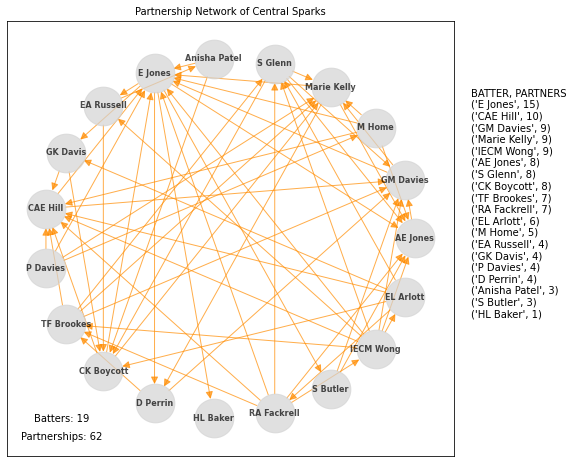

In [168]:
plt.figure(figsize=(8,8))
plt.title('Partnership Network of Central Sparks', fontsize =10)

G1=nx.from_pandas_edgelist(batter_partnership_network[batter_partnership_network['batting_team']=='Central Sparks'],
                          'from_node','to_node',create_using=nx.MultiDiGraph() )

pos = nx.circular_layout(G1,center=(1,1))      
nx.draw_networkx(G1, with_labels=True, pos=pos, node_size=1500, font_size=8, font_weight='bold', 
                 node_color='lightgrey',alpha=0.7,edge_color='darkorange', width=1.0, arrowsize=15)

batter_partners = sorted(G1.degree,key=lambda x: x[1],reverse=True)
str_bp = ""
for i in range(len(batter_partners)):
    bp = str(batter_partners[i])+"\n"
    str_bp = str_bp + bp

plt.text(2.3,0.5, 'BATTER, PARTNERS\n'+str_bp, fontsize=10)
plt.text(0.1, 0.0, 'Batters: '+str(G1.number_of_nodes()), horizontalalignment='center', verticalalignment='center')
plt.text(0.1, -0.1, 'Partnerships: '+str(G1.number_of_edges()), horizontalalignment='center', verticalalignment='center')

plt.savefig('C:/Users/DELL/Cricdata/Network_CentralSparks.jpeg',bbox_inches='tight')
plt.show()

In [165]:
sorted(G1.in_degree,key=lambda x: x[1],reverse=True)

[('E Jones', 9),
 ('CAE Hill', 8),
 ('AE Jones', 7),
 ('GM Davies', 7),
 ('Marie Kelly', 6),
 ('CK Boycott', 5),
 ('S Glenn', 4),
 ('TF Brookes', 3),
 ('EA Russell', 2),
 ('GK Davis', 2),
 ('D Perrin', 2),
 ('M Home', 1),
 ('Anisha Patel', 1),
 ('HL Baker', 1),
 ('RA Fackrell', 1),
 ('S Butler', 1),
 ('IECM Wong', 1),
 ('EL Arlott', 1),
 ('P Davies', 0)]

There were 62 unique partnerships for Central Sparks with 19 players involved. E Jones was part of 15 partnerships and her presence in different partnerships was not only the highest in her team but also among other teams. She contributed more runs in 9 of them. CAE Hill was in 10 partnerships, and she scored more runs in 8. GM Davies, Marie Kelly and IECM Wong all were in 9 partnerships. GM Davies scored higher in 7, Marie Kelly in 6 and IECM Wong in only 1.

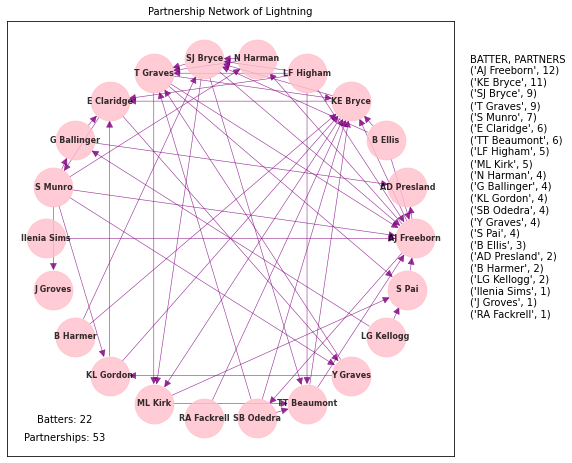

In [177]:
plt.figure(figsize=(8,8))
plt.title('Partnership Network of Lightning', fontsize =10)

G2=nx.from_pandas_edgelist(batter_partnership_network[batter_partnership_network['batting_team']=='Lightning'],
                          'from_node','to_node',create_using=nx.MultiDiGraph() )

pos = nx.circular_layout(G2,center=(1,1))      
nx.draw_networkx(G2, with_labels=True, pos=pos, node_size=1500, font_size=8, font_weight='bold', 
                 node_color='pink',alpha=0.8,edge_color='purple', width=0.6, arrowsize=15)

batter_partners = sorted(G2.degree,key=lambda x: x[1],reverse=True)
str_bp = ""
for i in range(len(batter_partners)):
    bp = str(batter_partners[i])+"\n"
    str_bp = str_bp + bp

plt.text(2.3,0.5, 'BATTER, PARTNERS\n'+str_bp, fontsize=10)
plt.text(0.1, 0.0, 'Batters: '+str(G2.number_of_nodes()), horizontalalignment='center', verticalalignment='center')
plt.text(0.1, -0.1, 'Partnerships: '+str(G2.number_of_edges()), horizontalalignment='center', verticalalignment='center')

plt.savefig('C:/Users/DELL/Cricdata/Network_Lightning.jpeg',bbox_inches='tight')
plt.show()

In [173]:
sorted(G2.in_degree,key=lambda x: x[1],reverse=True)

[('AJ Freeborn', 8),
 ('KE Bryce', 8),
 ('SJ Bryce', 5),
 ('T Graves', 5),
 ('E Claridge', 4),
 ('TT Beaumont', 4),
 ('ML Kirk', 3),
 ('S Pai', 3),
 ('AD Presland', 2),
 ('N Harman', 2),
 ('G Ballinger', 2),
 ('KL Gordon', 2),
 ('Y Graves', 2),
 ('S Munro', 1),
 ('J Groves', 1),
 ('SB Odedra', 1),
 ('B Ellis', 0),
 ('LF Higham', 0),
 ('Ilenia Sims', 0),
 ('B Harmer', 0),
 ('RA Fackrell', 0),
 ('LG Kellogg', 0)]

The team had 53 different partnerships among 22 players. AJ Freeborn was in 12 partnerships followed by KE Bryce in 11. SJ Bryce and T Graves both were part of 9 partnerships. Out of 12, AJ Freeborn was the dominant run scorer in 8. KE Bryce also scored more runs in 8 of her 11 partnerships. Both SJ Bryce and T Graves scored higher in 5 out of 9 partnerships. 

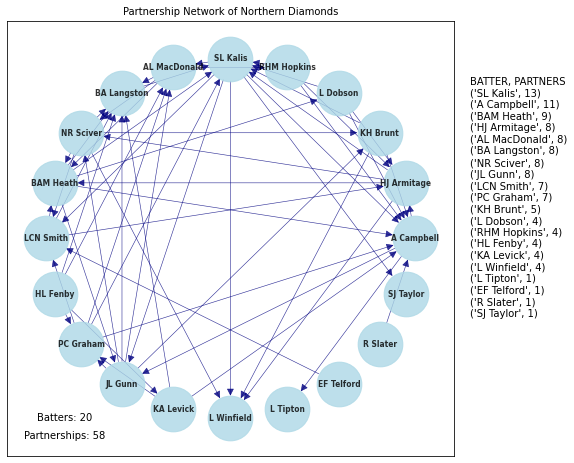

In [179]:
plt.figure(figsize=(8,8))
plt.title('Partnership Network of Northern Diamonds', fontsize =10)

G3=nx.from_pandas_edgelist(batter_partnership_network[batter_partnership_network['batting_team']=='Northern Diamonds'],
                          'from_node','to_node',create_using=nx.MultiDiGraph() )

pos = nx.circular_layout(G3,center=(1,1))      
nx.draw_networkx(G3, with_labels=True, pos=pos, node_size=2000, font_size=7.5, font_weight='bold', 
                 node_color='lightblue',alpha=0.8,edge_color='navy', width=0.6, arrowsize=15)

batter_partners = sorted(G3.degree,key=lambda x: x[1],reverse=True)
str_bp = ""
for i in range(len(batter_partners)):
    bp = str(batter_partners[i])+"\n"
    str_bp = str_bp + bp

plt.text(2.3,0.5, 'BATTER, PARTNERS\n'+str_bp, fontsize=10)
plt.text(0.1, 0.0, 'Batters: '+str(G3.number_of_nodes()), horizontalalignment='center', verticalalignment='center')
plt.text(0.1, -0.1, 'Partnerships: '+str(G3.number_of_edges()), horizontalalignment='center', verticalalignment='center')

plt.savefig('C:/Users/DELL/Cricdata/Network_NorthernDiamonds.jpeg',bbox_inches='tight')
plt.show()

In [180]:
sorted(G3.in_degree,key=lambda x: x[1],reverse=True)

[('A Campbell', 8),
 ('SL Kalis', 7),
 ('BA Langston', 7),
 ('HJ Armitage', 4),
 ('AL MacDonald', 4),
 ('BAM Heath', 4),
 ('LCN Smith', 4),
 ('L Winfield', 4),
 ('NR Sciver', 3),
 ('PC Graham', 3),
 ('JL Gunn', 3),
 ('KH Brunt', 2),
 ('L Dobson', 1),
 ('RHM Hopkins', 1),
 ('KA Levick', 1),
 ('L Tipton', 1),
 ('SJ Taylor', 1),
 ('HL Fenby', 0),
 ('EF Telford', 0),
 ('R Slater', 0)]

The number of unique batting partnerships for Northern Diamonds was 58 and 20 different batters were involved. SL Kalis was part of 13 partnerships and her run contribution was higher in 7 of those. A Campbell was in 11 partnerships, and she scored more runs in 8 of those. BAM Heath scored more runs in 4 out of her 9 partnerships.

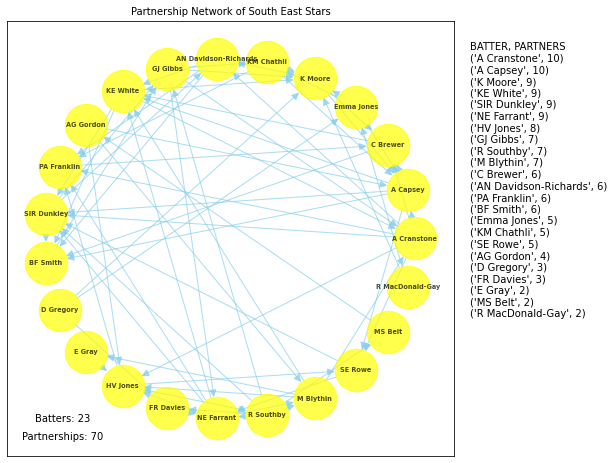

In [184]:
plt.figure(figsize=(8,8))
plt.title('Partnership Network of South East Stars', fontsize =10)

G4=nx.from_pandas_edgelist(batter_partnership_network[batter_partnership_network['batting_team']=='South East Stars'],
                          'from_node','to_node',create_using=nx.MultiDiGraph() )

pos = nx.circular_layout(G4,center=(1,1))      
nx.draw_networkx(G4, with_labels=True, pos=pos, node_size=1800, font_size=6.5, font_weight='bold', 
                 node_color='yellow',alpha=0.7,edge_color='skyblue', width=1.0, arrowsize=15)

batter_partners = sorted(G4.degree,key=lambda x: x[1],reverse=True)
str_bp = ""
for i in range(len(batter_partners)):
    bp = str(batter_partners[i])+"\n"
    str_bp = str_bp + bp

plt.text(2.3,0.5, 'BATTER, PARTNERS\n'+str_bp, fontsize=10)
plt.text(0.1, 0.0, 'Batters: '+str(G4.number_of_nodes()), horizontalalignment='center', verticalalignment='center')
plt.text(0.1, -0.1, 'Partnerships: '+str(G4.number_of_edges()), horizontalalignment='center', verticalalignment='center')

plt.savefig('C:/Users/DELL/Cricdata/Network_SouthEastStars.jpeg',bbox_inches='tight')
plt.show()

In [185]:
sorted(G4.in_degree,key=lambda x: x[1],reverse=True)

[('K Moore', 6),
 ('SIR Dunkley', 6),
 ('A Capsey', 5),
 ('KE White', 5),
 ('PA Franklin', 5),
 ('BF Smith', 5),
 ('HV Jones', 5),
 ('C Brewer', 4),
 ('NE Farrant', 4),
 ('A Cranstone', 3),
 ('AN Davidson-Richards', 3),
 ('GJ Gibbs', 3),
 ('M Blythin', 3),
 ('SE Rowe', 3),
 ('Emma Jones', 2),
 ('KM Chathli', 2),
 ('FR Davies', 2),
 ('AG Gordon', 1),
 ('E Gray', 1),
 ('R Southby', 1),
 ('MS Belt', 1),
 ('D Gregory', 0),
 ('R MacDonald-Gay', 0)]

South East Stars had 70, the highest number of unique batting partnerships as well as 23, the greatest number of different players batting for the team. The players with most batting partners were A Cranstone and A Capsey each of them being part of 10 partnerships. A Cranstone scored the higher proportion of runs in 3 partnerships while A Capsey scored in 5 of them. 

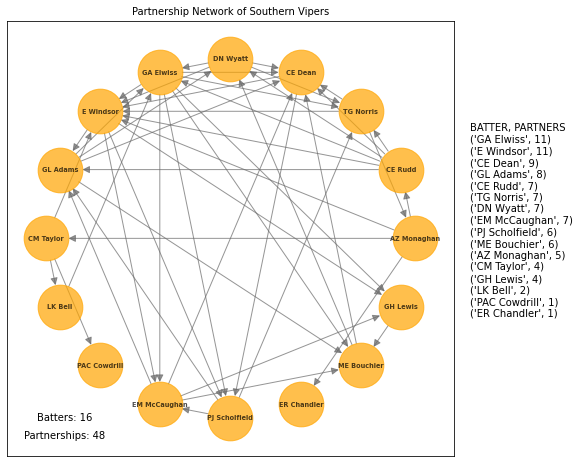

In [188]:
plt.figure(figsize=(8,8))
plt.title('Partnership Network of Southern Vipers', fontsize =10)

G5=nx.from_pandas_edgelist(batter_partnership_network[batter_partnership_network['batting_team']=='Southern Vipers'],
                          'from_node','to_node',create_using=nx.MultiDiGraph() )

pos = nx.circular_layout(G5,center=(1,1))      
nx.draw_networkx(G5, with_labels=True, pos=pos, node_size=2000, font_size=6.5, font_weight='bold', 
                 node_color='orange',alpha=0.7,edge_color='dimgrey', width=1.0, arrowsize=15)

batter_partners = sorted(G5.degree,key=lambda x: x[1],reverse=True)
str_bp = ""
for i in range(len(batter_partners)):
    bp = str(batter_partners[i])+"\n"
    str_bp = str_bp + bp

plt.text(2.3,0.5, 'BATTER, PARTNERS\n'+str_bp, fontsize=10)
plt.text(0.1, 0.0, 'Batters: '+str(G5.number_of_nodes()), horizontalalignment='center', verticalalignment='center')
plt.text(0.1, -0.1, 'Partnerships: '+str(G5.number_of_edges()), horizontalalignment='center', verticalalignment='center')

plt.savefig('C:/Users/DELL/Cricdata/Network_SouthernVipers.jpeg',bbox_inches='tight')
plt.show()

In [189]:
sorted(G5.in_degree,key=lambda x: x[1],reverse=True)

[('CE Dean', 7),
 ('E Windsor', 7),
 ('TG Norris', 4),
 ('GA Elwiss', 4),
 ('GL Adams', 4),
 ('ME Bouchier', 4),
 ('DN Wyatt', 3),
 ('EM McCaughan', 3),
 ('PJ Scholfield', 3),
 ('GH Lewis', 3),
 ('AZ Monaghan', 1),
 ('CE Rudd', 1),
 ('CM Taylor', 1),
 ('LK Bell', 1),
 ('PAC Cowdrill', 1),
 ('ER Chandler', 1)]

The Southern Vipers had 16 different players batting for them in the two years of the tournament and there were 48 unique partnerships among those players. GA Elwiss and E Windsor participated in partnerships with 11 other players followed by CE Dean with 9 partnerships and GL Adams with 8. In terms of scoring the higher proportion of runs in the partnerships, CE Dean scored more runs in 7 of her 9 partnerships. E Windsor was the dominant run scorer in 7 out of 11 partnerships. GA Elwiss scored more in only 4 out of 11 partnerships and for GL Adams it was 4 out of 8. 

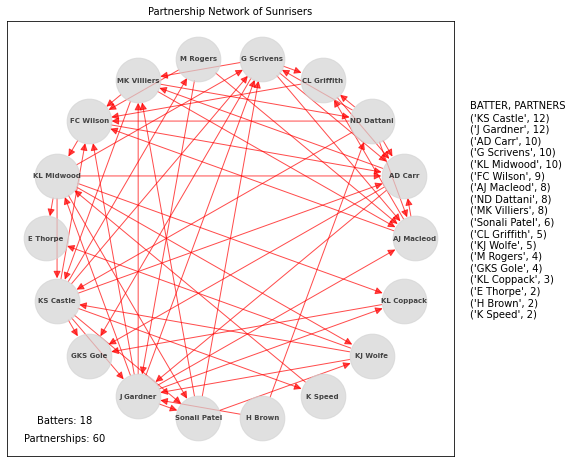

In [192]:
plt.figure(figsize=(8,8))
plt.title('Partnership Network of Sunrisers', fontsize =10)

G6=nx.from_pandas_edgelist(batter_partnership_network[batter_partnership_network['batting_team']=='Sunrisers'],
                          'from_node','to_node',create_using=nx.MultiDiGraph() )

pos = nx.circular_layout(G6,center=(1,1))      
nx.draw_networkx(G6, with_labels=True, pos=pos, node_size=2000, font_size=7, font_weight='bold', 
                 node_color='lightgrey',alpha=0.7,edge_color='red', width=1.0, arrowsize=15)

batter_partners = sorted(G6.degree,key=lambda x: x[1],reverse=True)
str_bp = ""
for i in range(len(batter_partners)):
    bp = str(batter_partners[i])+"\n"
    str_bp = str_bp + bp

plt.text(2.3,0.5, 'BATTER, PARTNERS\n'+str_bp, fontsize=10)
plt.text(0.1, 0.0, 'Batters: '+str(G6.number_of_nodes()), horizontalalignment='center', verticalalignment='center')
plt.text(0.1, -0.1, 'Partnerships: '+str(G6.number_of_edges()), horizontalalignment='center', verticalalignment='center')

plt.savefig('C:/Users/DELL/Cricdata/Network_Sunrisers.jpeg',bbox_inches='tight')
plt.show()

In [193]:
sorted(G6.in_degree,key=lambda x: x[1],reverse=True)

[('AD Carr', 7),
 ('FC Wilson', 7),
 ('AJ Macleod', 5),
 ('G Scrivens', 5),
 ('J Gardner', 5),
 ('MK Villiers', 4),
 ('KS Castle', 4),
 ('GKS Gole', 4),
 ('CL Griffith', 3),
 ('KL Midwood', 3),
 ('Sonali Patel', 3),
 ('ND Dattani', 2),
 ('E Thorpe', 2),
 ('KJ Wolfe', 2),
 ('KL Coppack', 2),
 ('M Rogers', 1),
 ('K Speed', 1),
 ('H Brown', 0)]

The Sunrisers had 18 players and 60 different partnerships. KS Castle and J Gardner each were partnered with 12 other players with the former contributing more runs in 4 of them while the latter scored more runs in 5 of them. AD Carr, G Scrivens and KL Midwood each were part of 10 partnerships. AD Carr scored more runs in 7 out of 10, G Scrivens in 5 and KL Midwood in only 3 out of 10. 

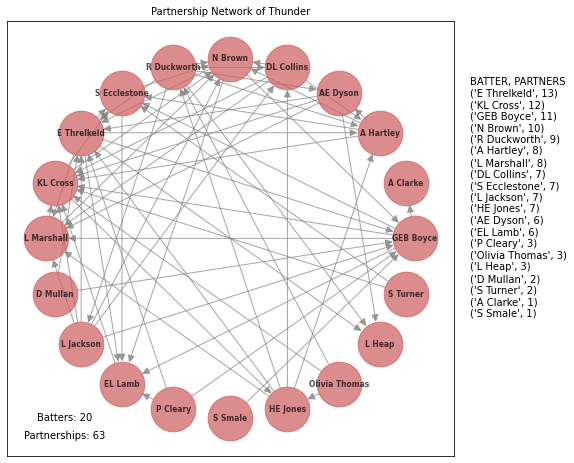

In [196]:
plt.figure(figsize=(8,8))
plt.title('Partnership Network of Thunder', fontsize =10)

G7=nx.from_pandas_edgelist(batter_partnership_network[batter_partnership_network['batting_team']=='Thunder'],
                          'from_node','to_node',create_using=nx.MultiDiGraph() )

pos = nx.circular_layout(G7,center=(1,1))      
nx.draw_networkx(G7, with_labels=True, pos=pos, node_size=2000, font_size=7.5, font_weight='bold', 
                 node_color='indianred',alpha=0.7,edge_color='grey', width=1.0, arrowsize=15)

batter_partners = sorted(G7.degree,key=lambda x: x[1],reverse=True)
str_bp = ""
for i in range(len(batter_partners)):
    bp = str(batter_partners[i])+"\n"
    str_bp = str_bp + bp

plt.text(2.3,0.5, 'BATTER, PARTNERS\n'+str_bp, fontsize=10)
plt.text(0.1, 0.0, 'Batters: '+str(G7.number_of_nodes()), horizontalalignment='center', verticalalignment='center')
plt.text(0.1, -0.1, 'Partnerships: '+str(G7.number_of_edges()), horizontalalignment='center', verticalalignment='center')

plt.savefig('C:/Users/DELL/Cricdata/Network_Thunder.jpeg',bbox_inches='tight')
plt.show()

In [197]:
sorted(G7.in_degree,key=lambda x: x[1],reverse=True)

[('KL Cross', 9),
 ('N Brown', 7),
 ('E Threlkeld', 7),
 ('GEB Boyce', 6),
 ('L Marshall', 6),
 ('S Ecclestone', 5),
 ('EL Lamb', 5),
 ('A Hartley', 4),
 ('DL Collins', 3),
 ('L Heap', 3),
 ('AE Dyson', 2),
 ('R Duckworth', 2),
 ('HE Jones', 2),
 ('A Clarke', 1),
 ('L Jackson', 1),
 ('D Mullan', 0),
 ('P Cleary', 0),
 ('S Smale', 0),
 ('Olivia Thomas', 0),
 ('S Turner', 0)]

North West Thunder had 63 partnerships. Of the 20 different players who batted, E Threlkeld was in 13 partnerships, contributing more runs in 7 of them. KL Cross played in 12 partnerships, scoring more runs in 9 of them. GEB Boyce scored more runs in 6 of her 11 partnerships and N Brown in 7 of her 10. 

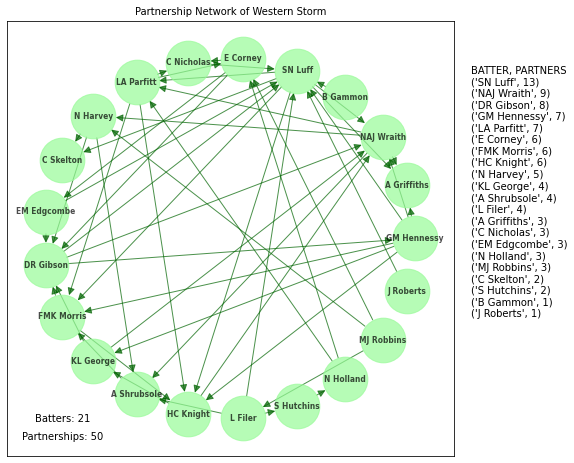

In [200]:
plt.figure(figsize=(8,8))
plt.title('Partnership Network of Western Storm', fontsize =10)

G8=nx.from_pandas_edgelist(batter_partnership_network[batter_partnership_network['batting_team']=='Western Storm'],
                          'from_node','to_node',create_using=nx.MultiDiGraph() )

pos = nx.circular_layout(G8,center=(1,1))      
nx.draw_networkx(G8, with_labels=True, pos=pos, node_size=2000, font_size=7.5, font_weight='bold', 
                 node_color='palegreen',alpha=0.7,edge_color='darkgreen', width=1.0, arrowsize=15)

batter_partners = sorted(G8.degree,key=lambda x: x[1],reverse=True)
str_bp = ""
for i in range(len(batter_partners)):
    bp = str(batter_partners[i])+"\n"
    str_bp = str_bp + bp

plt.text(2.3,0.5, 'BATTER, PARTNERS\n'+str_bp, fontsize=10)
plt.text(0.1, 0.0, 'Batters: '+str(G8.number_of_nodes()), horizontalalignment='center', verticalalignment='center')
plt.text(0.1, -0.1, 'Partnerships: '+str(G8.number_of_edges()), horizontalalignment='center', verticalalignment='center')

plt.savefig('C:/Users/DELL/Cricdata/Network_WesternStorm.jpeg',bbox_inches='tight')
plt.show()

In [201]:
sorted(G8.in_degree,key=lambda x: x[1],reverse=True)

[('SN Luff', 7),
 ('NAJ Wraith', 5),
 ('DR Gibson', 5),
 ('FMK Morris', 4),
 ('HC Knight', 4),
 ('A Griffiths', 3),
 ('E Corney', 3),
 ('LA Parfitt', 3),
 ('A Shrubsole', 3),
 ('C Nicholas', 2),
 ('N Harvey', 2),
 ('C Skelton', 2),
 ('KL George', 2),
 ('GM Hennessy', 1),
 ('EM Edgcombe', 1),
 ('L Filer', 1),
 ('S Hutchins', 1),
 ('N Holland', 1),
 ('B Gammon', 0),
 ('MJ Robbins', 0),
 ('J Roberts', 0)]

For Western Storm there were 21 different batters participating in 50 different partnerships. SN Luff partnered with 13 other players and was the higher run scorer in 7 of them. NAJ Wraith scored higher in 5 out of her 9 partnerships and DR Gibson in 5 out of her 8. 

## Partnership Networks of Southern Vipers and Sunrisers per match

In [212]:
batter_partnership_innings.head()

,match_id,season,start_date,innings,batting_team,bowling_team,partnership,runs_off_bat,net_runs,batter1,batter1_runs,batter2,batter2_runs,message,partner_labels
0,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,AJ Macleod & MK Villiers,2,3,AJ Macleod,2,MK Villiers,0,vs Southern Vipers (29-08-2020),AJ Macleod & MK Villiers (Sunrisers)
1,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,FC Wilson & KL Midwood,5,5,FC Wilson,0,KL Midwood,5,vs Southern Vipers (29-08-2020),FC Wilson & KL Midwood (Sunrisers)
2,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,FC Wilson & ND Dattani,13,15,FC Wilson,11,ND Dattani,2,vs Southern Vipers (29-08-2020),FC Wilson & ND Dattani (Sunrisers)
3,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,G Scrivens & MK Villiers,18,21,G Scrivens,8,MK Villiers,10,vs Southern Vipers (29-08-2020),G Scrivens & MK Villiers (Sunrisers)
4,1229326,2020,29-08-2020,1,Sunrisers,Southern Vipers,KJ Wolfe & KS Castle,5,10,KJ Wolfe,2,KS Castle,3,vs Southern Vipers (29-08-2020),KJ Wolfe & KS Castle (Sunrisers)


In [213]:
#extract data only for the teams Southern Vipers and Sunrisers
SVSN_network_innings = batter_partnership_innings[(batter_partnership_innings['batting_team']=='Southern Vipers') |
                                                 (batter_partnership_innings['batting_team']=='Sunrisers')]

In [214]:
SVSN_network_innings.columns

Index(['match_id', 'season', 'start_date', 'innings', 'batting_team',
       'bowling_team', 'partnership', 'runs_off_bat', 'net_runs', 'batter1',
       'batter1_runs', 'batter2', 'batter2_runs', 'message', 'partner_labels'],
      dtype='object')

In [215]:
SVSN_network_innings = SVSN_network_innings[['match_id','batting_team','partnership','net_runs',
                                             'batter1','batter1_runs','batter2','batter2_runs','innings']]

In [216]:
SVSN_network_innings.head()

,match_id,batting_team,partnership,net_runs,batter1,batter1_runs,batter2,batter2_runs,innings
0,1229326,Sunrisers,AJ Macleod & MK Villiers,3,AJ Macleod,2,MK Villiers,0,1
1,1229326,Sunrisers,FC Wilson & KL Midwood,5,FC Wilson,0,KL Midwood,5,1
2,1229326,Sunrisers,FC Wilson & ND Dattani,15,FC Wilson,11,ND Dattani,2,1
3,1229326,Sunrisers,G Scrivens & MK Villiers,21,G Scrivens,8,MK Villiers,10,1
4,1229326,Sunrisers,KJ Wolfe & KS Castle,10,KJ Wolfe,2,KS Castle,3,1


In [217]:
SVSN_network_innings.reset_index(inplace=True,drop=True)

In [218]:
SVSN_network_innings.head()

,match_id,batting_team,partnership,net_runs,batter1,batter1_runs,batter2,batter2_runs,innings
0,1229326,Sunrisers,AJ Macleod & MK Villiers,3,AJ Macleod,2,MK Villiers,0,1
1,1229326,Sunrisers,FC Wilson & KL Midwood,5,FC Wilson,0,KL Midwood,5,1
2,1229326,Sunrisers,FC Wilson & ND Dattani,15,FC Wilson,11,ND Dattani,2,1
3,1229326,Sunrisers,G Scrivens & MK Villiers,21,G Scrivens,8,MK Villiers,10,1
4,1229326,Sunrisers,KJ Wolfe & KS Castle,10,KJ Wolfe,2,KS Castle,3,1


In [ ]:
SVSN_network_innings['from_node']=np.nan
SVSN_network_innings['to_node']=np.nan

for i in range(len(SVSN_network_innings)):
    if min(SVSN_network_innings['batter1_runs'][i],SVSN_network_innings['batter2_runs'][i])==SVSN_network_innings['batter1_runs'][i]:
        SVSN_network_innings['from_node'][i] = SVSN_network_innings['batter1'][i]
        SVSN_network_innings['to_node'][i] = SVSN_network_innings['batter2'][i]
    else:
        SVSN_network_innings['from_node'][i] = SVSN_network_innings['batter2'][i]
        SVSN_network_innings['to_node'][i] = SVSN_network_innings['batter1'][i]

In [220]:
SVSN_network_innings.head()

,match_id,batting_team,partnership,net_runs,batter1,batter1_runs,batter2,batter2_runs,innings,from_node,to_node
0,1229326,Sunrisers,AJ Macleod & MK Villiers,3,AJ Macleod,2,MK Villiers,0,1,MK Villiers,AJ Macleod
1,1229326,Sunrisers,FC Wilson & KL Midwood,5,FC Wilson,0,KL Midwood,5,1,FC Wilson,KL Midwood
2,1229326,Sunrisers,FC Wilson & ND Dattani,15,FC Wilson,11,ND Dattani,2,1,ND Dattani,FC Wilson
3,1229326,Sunrisers,G Scrivens & MK Villiers,21,G Scrivens,8,MK Villiers,10,1,G Scrivens,MK Villiers
4,1229326,Sunrisers,KJ Wolfe & KS Castle,10,KJ Wolfe,2,KS Castle,3,1,KJ Wolfe,KS Castle


In [ ]:
zerorows=SVSN_network_innings.loc[SVSN_network_innings['net_runs']==0]
SVSN_network_innings.drop(zerorows.index,0,inplace=True)
SVSN_network_innings.reset_index(inplace=True,drop=True)

In [223]:
match_info=pd.read_csv("C:\\Users\\DELL\\Cricdata\\match_summary.csv")

In [224]:
match_info.head()

,match_id,Team1,Team2,Season,Date,Venue,Toss_Winner,Toss_Decision,Winner,Winning_Margin,ByWickets,ByRuns
0,1229326,Sunrisers,Southern Vipers,2020,29-08-2020,Chelmsford,Southern Vipers,field,Southern Vipers,7,Y,N
1,1229327,Central Sparks,Northern Diamonds,2020,29-08-2020,Birmingham,Central Sparks,bat,Northern Diamonds,9,Y,N
2,1229328,Thunder,Lightning,2020,29-08-2020,Nottingham,Thunder,bat,Thunder,4,N,Y
3,1229329,South East Stars,Western Storm,2020,29-08-2020,Beckenham,Western Storm,field,Western Storm,6,Y,N
4,1229330,Southern Vipers,Western Storm,2020,31-08-2020,Bristol,Western Storm,field,Southern Vipers,22,N,Y


In [225]:
match_info_winner = match_info[['match_id','Winner']]

In [226]:
match_info_winner.head()

,match_id,Winner
0,1229326,Southern Vipers
1,1229327,Northern Diamonds
2,1229328,Thunder
3,1229329,Western Storm
4,1229330,Southern Vipers


In [227]:
SVSN_network_innings = pd.merge(SVSN_network_innings,match_info_winner,how="outer",on='match_id')

In [228]:
SVSN_network_innings.head()

,match_id,batting_team,partnership,net_runs,batter1,batter1_runs,batter2,batter2_runs,innings,from_node,to_node,Winner
0,1229326,Sunrisers,AJ Macleod & MK Villiers,3.0,AJ Macleod,2.0,MK Villiers,0.0,1.0,MK Villiers,AJ Macleod,Southern Vipers
1,1229326,Sunrisers,FC Wilson & KL Midwood,5.0,FC Wilson,0.0,KL Midwood,5.0,1.0,FC Wilson,KL Midwood,Southern Vipers
2,1229326,Sunrisers,FC Wilson & ND Dattani,15.0,FC Wilson,11.0,ND Dattani,2.0,1.0,ND Dattani,FC Wilson,Southern Vipers
3,1229326,Sunrisers,G Scrivens & MK Villiers,21.0,G Scrivens,8.0,MK Villiers,10.0,1.0,G Scrivens,MK Villiers,Southern Vipers
4,1229326,Sunrisers,KJ Wolfe & KS Castle,10.0,KJ Wolfe,2.0,KS Castle,3.0,1.0,KJ Wolfe,KS Castle,Southern Vipers


In [229]:
#save the dataframe to csv file
#SVSN_network_innings.to_csv("C:\\Users\\DELL\\Cricdata\\SVSN_network_innings.csv",index=False)

In [40]:
SVSN_network_innings = pd.read_csv("C:\\Users\\DELL\\Cricdata\\SVSN_network_innings.csv")

In [ ]:
SVSN_network_innings['message']=np.nan

for i in range(len(SVSN_network_innings)):
    if SVSN_network_innings['batting_team'][i]==SVSN_network_innings['Winner'][i]:
        if SVSN_network_innings['innings'][i] == 1:
            SVSN_network_innings['message'][i] = "Won by defending total"
        else:
            SVSN_network_innings['message'][i] = "Won by chasing total"
    else:
        if SVSN_network_innings['innings'][i] == 1:
            SVSN_network_innings['message'][i] = "Lost while defending total"
        else:
            SVSN_network_innings['message'][i] = "Lost while chasing total"

In [231]:
SVSN_network_innings.head()

,match_id,batting_team,partnership,net_runs,batter1,batter1_runs,batter2,batter2_runs,innings,from_node,to_node,Winner,message
0,1229326,Sunrisers,AJ Macleod & MK Villiers,3.0,AJ Macleod,2.0,MK Villiers,0.0,1.0,MK Villiers,AJ Macleod,Southern Vipers,Lost while defending total
1,1229326,Sunrisers,FC Wilson & KL Midwood,5.0,FC Wilson,0.0,KL Midwood,5.0,1.0,FC Wilson,KL Midwood,Southern Vipers,Lost while defending total
2,1229326,Sunrisers,FC Wilson & ND Dattani,15.0,FC Wilson,11.0,ND Dattani,2.0,1.0,ND Dattani,FC Wilson,Southern Vipers,Lost while defending total
3,1229326,Sunrisers,G Scrivens & MK Villiers,21.0,G Scrivens,8.0,MK Villiers,10.0,1.0,G Scrivens,MK Villiers,Southern Vipers,Lost while defending total
4,1229326,Sunrisers,KJ Wolfe & KS Castle,10.0,KJ Wolfe,2.0,KS Castle,3.0,1.0,KJ Wolfe,KS Castle,Southern Vipers,Lost while defending total


In [41]:
SV_network = SVSN_network_innings[SVSN_network_innings['batting_team']=='Southern Vipers']
SV_network.head()

,match_id,batting_team,partnership,net_runs,batter1,batter1_runs,batter2,batter2_runs,innings,from_node,to_node,Winner
10,1229326,Southern Vipers,GL Adams & DN Wyatt,111.0,GL Adams,37.0,DN Wyatt,54.0,2.0,GL Adams,DN Wyatt,Southern Vipers
11,1229326,Southern Vipers,ME Bouchier & CE Dean,40.0,ME Bouchier,16.0,CE Dean,23.0,2.0,ME Bouchier,CE Dean,Southern Vipers
12,1229326,Southern Vipers,ME Bouchier & DN Wyatt,29.0,ME Bouchier,17.0,DN Wyatt,12.0,2.0,DN Wyatt,ME Bouchier,Southern Vipers
13,1229326,Southern Vipers,PJ Scholfield & CE Dean,28.0,PJ Scholfield,23.0,CE Dean,4.0,2.0,CE Dean,PJ Scholfield,Southern Vipers
14,1229330,Southern Vipers,CE Dean & CE Rudd,21.0,CE Dean,12.0,CE Rudd,5.0,1.0,CE Rudd,CE Dean,Southern Vipers


In [233]:
matches = SV_network['match_id'].unique()
matches

array([1229326, 1229330, 1229337, 1229340, 1229342, 1229346, 1229350,
       1252267, 1252270, 1252275, 1252279, 1252283, 1252287, 1252291,
       1252293], dtype=int64)

In [235]:
len(matches)

15

In [236]:
msg = SV_network.groupby('match_id')['message'].unique()
msg

match_id
1229326        [Won by chasing total]
1229330      [Won by defending total]
1229337      [Won by defending total]
1229340      [Won by defending total]
1229342      [Won by defending total]
1229346        [Won by chasing total]
1229350      [Won by defending total]
1252267        [Won by chasing total]
1252270        [Won by chasing total]
1252275    [Lost while chasing total]
1252279        [Won by chasing total]
1252283        [Won by chasing total]
1252287      [Won by defending total]
1252291        [Won by chasing total]
1252293        [Won by chasing total]
Name: message, dtype: object

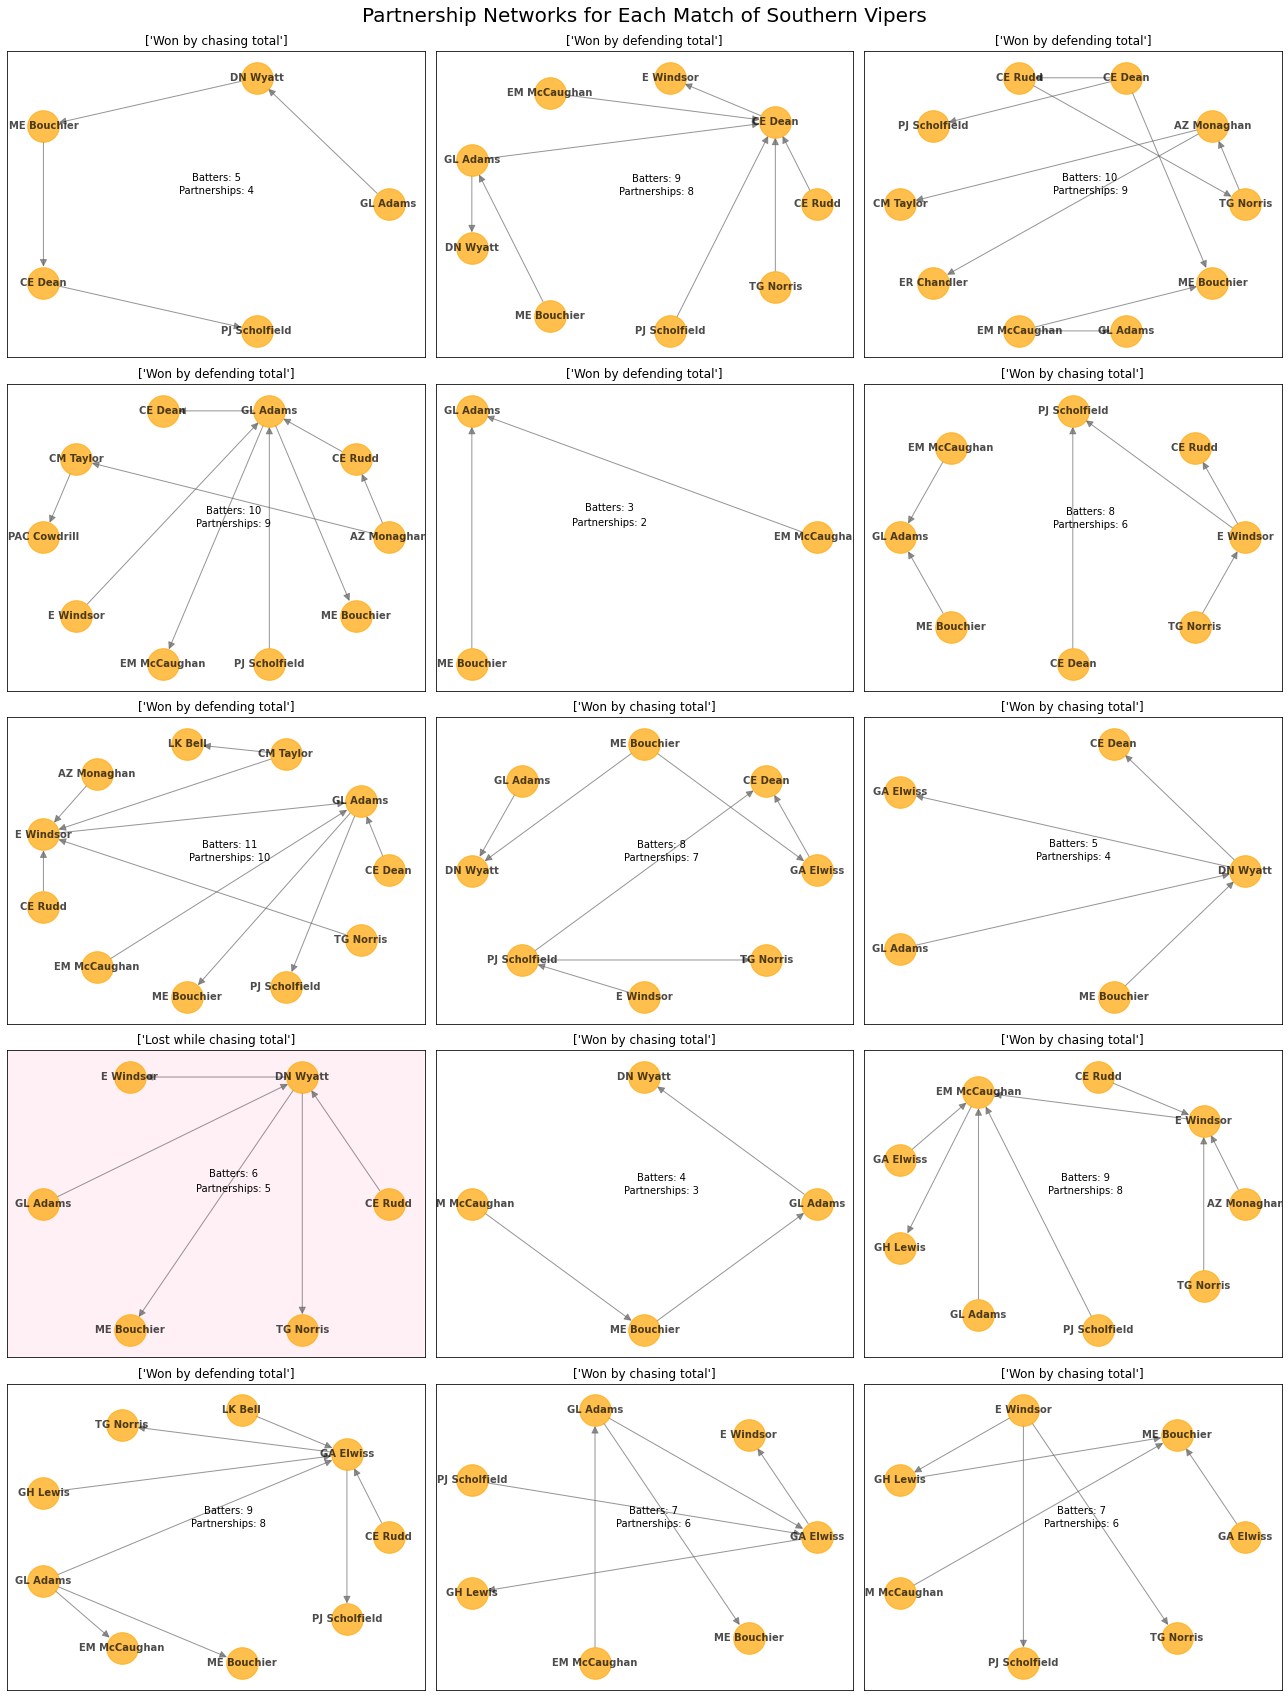

In [238]:
#Partnership Networks for Each Match of Southern Vipers
fig,ax = plt.subplots(nrows=5, ncols=3, figsize=(18, 24))
fig.suptitle('Partnership Networks for Each Match of Southern Vipers\n', fontsize =20)

for i in range(len(matches)):
    ax=plt.subplot(5,3,i+1)  
    
    ax.set(title=msg[matches[i]])
    if (msg[matches[i]]=='Lost while chasing total') | (msg[matches[i]]=='Lost while defending total'):
        ax.patch.set_facecolor('lavenderblush')
      
    G=nx.from_pandas_edgelist(SV_network[SV_network['match_id']==matches[i]],'from_node','to_node',
                               create_using=nx.MultiDiGraph() )  
    
    pos=nx.circular_layout(G) 
    nx.draw_networkx(G, with_labels=True, pos=pos, node_size=1000, font_size=10, font_weight='bold', 
                 node_color='orange', alpha=0.7, edge_color='dimgrey', width=1.0, arrowsize=15)
    
    plt.text(0.1, 0.2, 'Batters: '+str(G.number_of_nodes()), horizontalalignment='center', verticalalignment='center')
    plt.text(0.1, 0.1, 'Partnerships: '+str(G.number_of_edges()), horizontalalignment='center', verticalalignment='center')

      

plt.tight_layout()

plt.savefig('C:\\Users\\DELL\\Cricdata\\Network_SouthernVipers_perMatch.jpeg') 
plt.show()

The Southern Vipers won eight of their fourteen matches batting second and in three of those they could manage to chase the target with 6 partnerships. In two matches 4 partnerships were sufficient to reach the target and for another one it was just 3. One match required 7 and another one required 8 partnerships. Of the six matches won batting first, two of them had 8 and another two had 9 partnerships. One had only 2 partnerships while only one had 10 partnerships requiring all the eleven players to bat. They only lost one match (shown in red background) where they had 5 partnerships with 6 batters.

In [239]:
SV_network.head()

,match_id,batting_team,partnership,net_runs,batter1,batter1_runs,batter2,batter2_runs,innings,from_node,to_node,Winner,message
10,1229326,Southern Vipers,GL Adams & DN Wyatt,111.0,GL Adams,37.0,DN Wyatt,54.0,2.0,GL Adams,DN Wyatt,Southern Vipers,Won by chasing total
11,1229326,Southern Vipers,ME Bouchier & CE Dean,40.0,ME Bouchier,16.0,CE Dean,23.0,2.0,ME Bouchier,CE Dean,Southern Vipers,Won by chasing total
12,1229326,Southern Vipers,ME Bouchier & DN Wyatt,29.0,ME Bouchier,17.0,DN Wyatt,12.0,2.0,DN Wyatt,ME Bouchier,Southern Vipers,Won by chasing total
13,1229326,Southern Vipers,PJ Scholfield & CE Dean,28.0,PJ Scholfield,23.0,CE Dean,4.0,2.0,CE Dean,PJ Scholfield,Southern Vipers,Won by chasing total
14,1229330,Southern Vipers,CE Dean & CE Rudd,21.0,CE Dean,12.0,CE Rudd,5.0,1.0,CE Rudd,CE Dean,Southern Vipers,Won by defending total


<Figure size 1440x216 with 0 Axes>

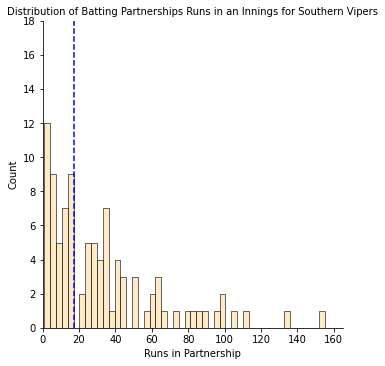

In [47]:
#plot distribution of Runs Scored in Batting Partnerships in an innings for Southern Vipers
plt.figure(figsize=(20,3))

sns.displot(data=SV_network,x='net_runs', bins=48, multiple="stack", color="moccasin")
plt.title('Distribution of Batting Partnerships Runs in an Innings for Southern Vipers',fontsize=10)
plt.xlabel('Runs in Partnership')
plt.xlim(0,165)
plt.ylim(0,18)
plt.axvline(x=df.net_runs.median(),color='blue',ls='--',lw=1.5) #show median line

plt.savefig('C:\\Users\\DELL\\Cricdata\\Partnership_SouthernVipers_Dist_innings.jpeg',bbox_inches='tight')
plt.show()

In [44]:
SN_network = SVSN_network_innings[SVSN_network_innings['batting_team']=='Sunrisers']
SN_network.head()

,match_id,batting_team,partnership,net_runs,batter1,batter1_runs,batter2,batter2_runs,innings,from_node,to_node,Winner
0,1229326,Sunrisers,AJ Macleod & MK Villiers,3.0,AJ Macleod,2.0,MK Villiers,0.0,1.0,MK Villiers,AJ Macleod,Southern Vipers
1,1229326,Sunrisers,FC Wilson & KL Midwood,5.0,FC Wilson,0.0,KL Midwood,5.0,1.0,FC Wilson,KL Midwood,Southern Vipers
2,1229326,Sunrisers,FC Wilson & ND Dattani,15.0,FC Wilson,11.0,ND Dattani,2.0,1.0,ND Dattani,FC Wilson,Southern Vipers
3,1229326,Sunrisers,G Scrivens & MK Villiers,21.0,G Scrivens,8.0,MK Villiers,10.0,1.0,G Scrivens,MK Villiers,Southern Vipers
4,1229326,Sunrisers,KJ Wolfe & KS Castle,10.0,KJ Wolfe,2.0,KS Castle,3.0,1.0,KJ Wolfe,KS Castle,Southern Vipers


In [249]:
matches1 = SN_network['match_id'].unique()
len(matches1)

13

In [250]:
msg1 = SN_network.groupby('match_id')['message'].unique()
msg1

match_id
1229326    [Lost while defending total]
1229331      [Lost while chasing total]
1229335      [Lost while chasing total]
1229340      [Lost while chasing total]
1229343    [Lost while defending total]
1229349      [Lost while chasing total]
1252266      [Lost while chasing total]
1252271      [Lost while chasing total]
1252273    [Lost while defending total]
1252277    [Lost while defending total]
1252282    [Lost while defending total]
1252287      [Lost while chasing total]
1252290      [Lost while chasing total]
Name: message, dtype: object

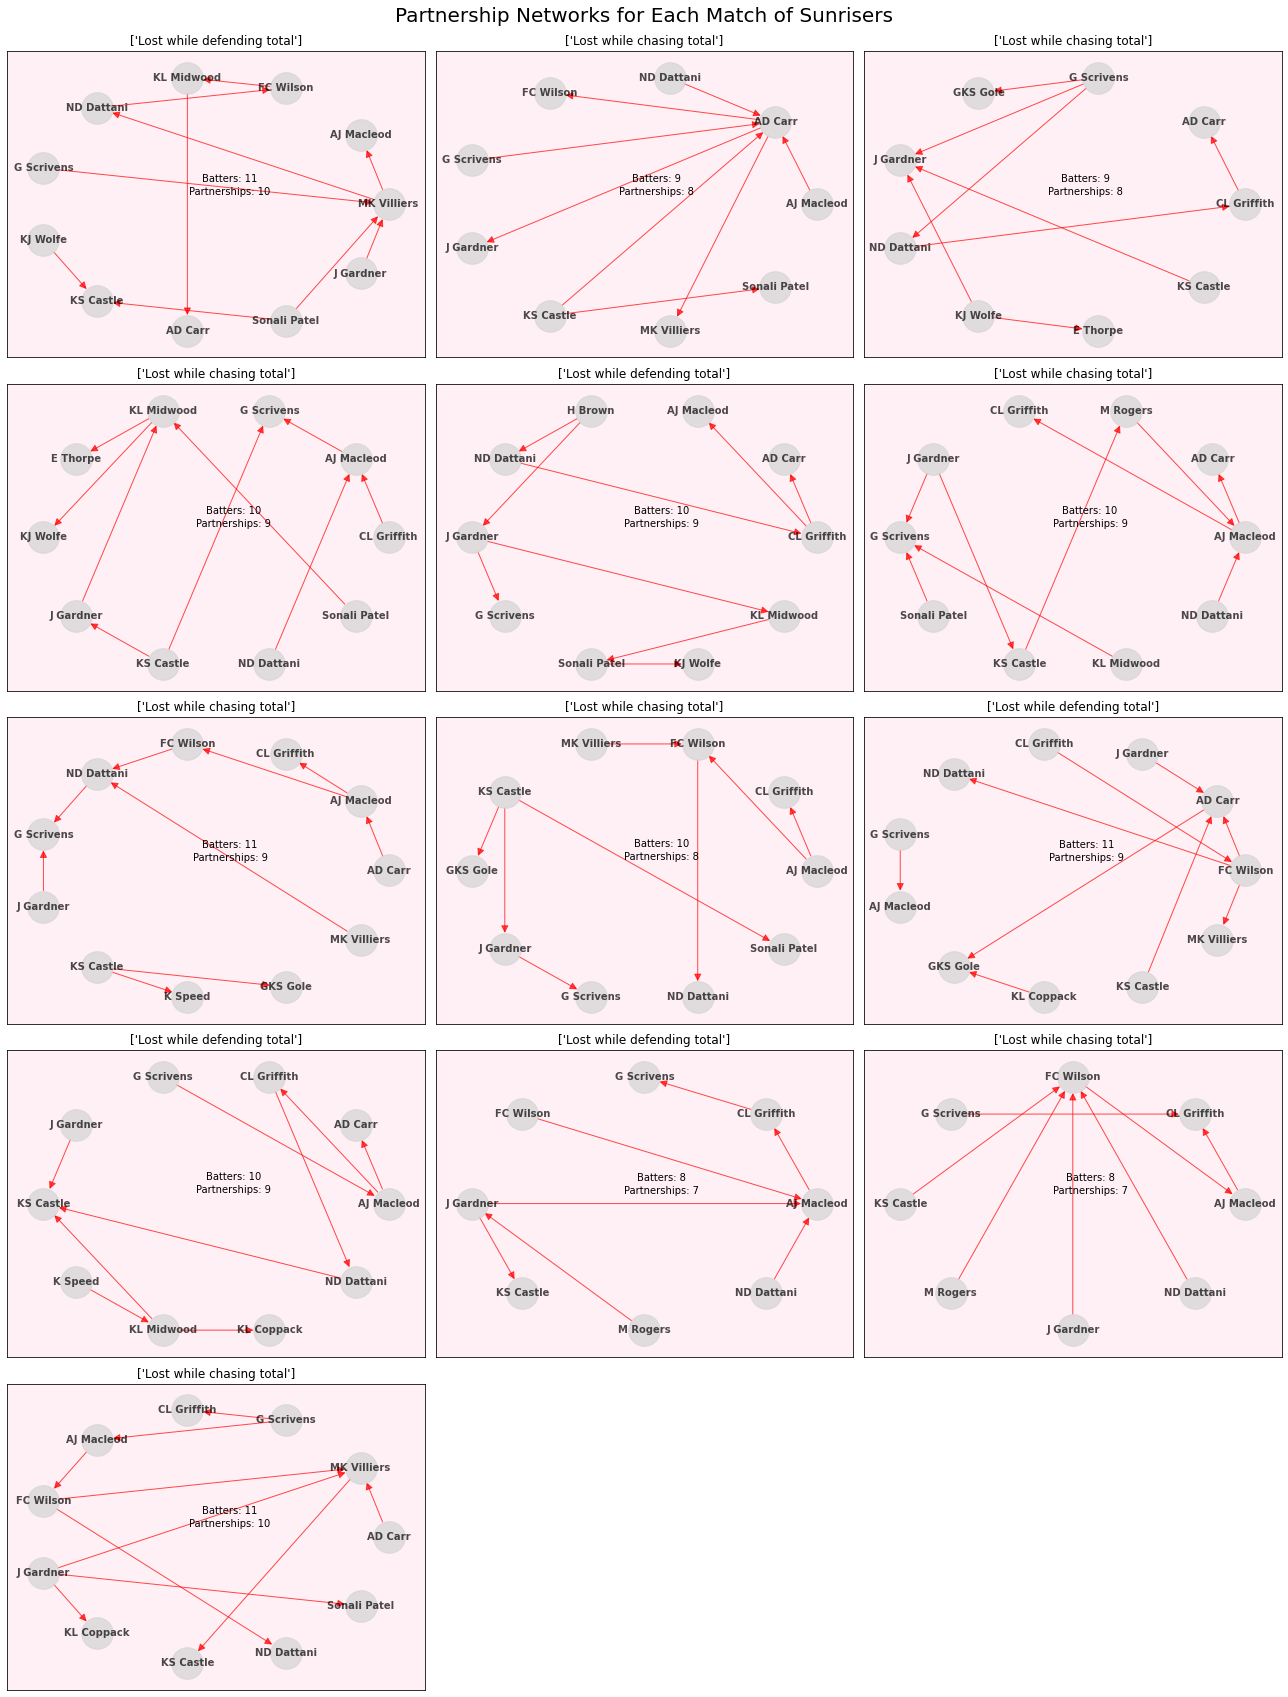

In [251]:
#Partnership Networks for Each Match of Sunrisers
fig,ax = plt.subplots(nrows=5, ncols=3, figsize=(18, 24))
fig.suptitle('Partnership Networks for Each Match of Sunrisers\n', fontsize =20)

for i in range(len(matches1)):
    ax=plt.subplot(5,3,i+1)
    
    ax.set(title=msg1[matches1[i]])
    if (msg1[matches1[i]]=='Lost while chasing total') | (msg1[matches1[i]]=='Lost while defending total'):
        ax.patch.set_facecolor('lavenderblush')
      
    G=nx.from_pandas_edgelist(SN_network[SN_network['match_id']==matches1[i]],'from_node','to_node',
                               create_using=nx.MultiDiGraph() )  
    
    pos=nx.circular_layout(G) 
    nx.draw_networkx(G, with_labels=True, pos=pos, node_size=1000, font_size=10, font_weight='bold', 
                 node_color='lightgrey',alpha=0.7,edge_color='red', width=1.0, arrowsize=15)
    
    plt.text(0.1, 0.2, 'Batters: '+str(G.number_of_nodes()), horizontalalignment='center', verticalalignment='center')
    plt.text(0.1, 0.1, 'Partnerships: '+str(G.number_of_edges()), horizontalalignment='center', verticalalignment='center')
    
plt.subplot(5,3,14).remove()
plt.subplot(5,3,15).remove()    

plt.tight_layout()

plt.savefig('C:\\Users\\DELL\\Cricdata\\Network_Sunrisers_perMatch.jpeg') 
plt.show()

The Sunrisers lost all their matches and in six of those matches, they needed 9 partnerships while batting and in two of those, all eleven players had to come out to bat. For two matches, they needed 10 partnerships and then also all the eleven players had to bat. Three matches had 8 while two had 7 partnerships.  

<Figure size 1440x216 with 0 Axes>

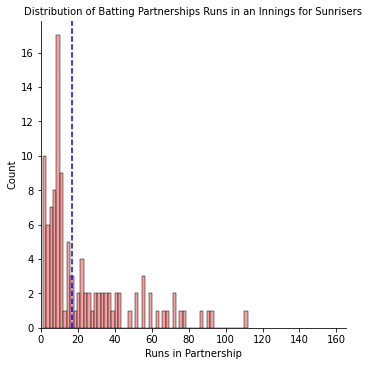

In [45]:
#plot distribution of Runs Scored in Batting Partnerships in an innings for Sunrisers
plt.figure(figsize=(20,3))

sns.displot(data=SN_network,x='net_runs', bins=60, multiple="stack", color="lightcoral")
plt.title('Distribution of Batting Partnerships Runs in an Innings for Sunrisers',fontsize=10)
plt.xlabel('Runs in Partnership')
plt.xlim(0,165)

plt.axvline(x=df.net_runs.median(),color='blue',ls='--',lw=1.5) #show median line

plt.savefig('C:\\Users\\DELL\\Cricdata\\Partnership_Sunrisers_Dist_innings.jpeg',bbox_inches='tight')
plt.show()